# Pima Indians diabetes mellitus classification based on machine learning (ML) algorthims

## Project task

Na prvom roku predaje se očekuje da pripremite podatke iz danog skupa (učitati podatke, deskriptivna statistika, pozabaviti se nedostajućim/čudnim vrijednostima, pogledati koliko podataka uopće ima, kakvi su tipovi podataka, itd.) i malo ih vizualizirate (Primjeri: korelacijska matrica, scatter plot za neke zanimljive parove značajki, ...) . Rok za predaju prvog dijela projekta je 19.01.2024. i maksimalan broj bodova koji možete ostvariti je 20. 

U drugoj fazi projekta replicirate rezultate iz članka (implementacija prediktivnih modela iz članka, usporedba rezultata, ...). Kao što je spomenuto i u dokumentu s uputama za projekt, ova faza projekta je značajno teža od prve pa to svakako imajte na umu ako planirate ići na predaju i ovog dijela. Rok za predaju drugog dijela projekta je 24.01.2024. i maksimalan broj bodova koji možete ostvariti je 5. 

In [60]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('diabetes.csv')

In [3]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [4]:
df.info()

# 9 columns (8 characterics + 1 corresponding clf), 768 rows
# data types can be seen

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
# but also...

df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

From the article:

Preg - Number of times pregnant Numeric [0, 17]

Gluc - Plasma glucose concentration at 2 Hours in an oral glucose tolerance test (GTIT) Numeric [0, 199]

BP - Diastolic Blood Pressure (mm Hg) Numeric [0, 122]

Skin - Triceps skin fold thickness (mm) Numeric [0, 99]

Insulin - 2-Hour Serum insulin (lh/ml) Numeric [0, 846]

BMI - Body mass index [weight in kg/(Height in m)] Numeric [0, 67.1]

DPF - Diabetes pedigree function Numeric [0.078, 2.42]

Age - Age (years) Numeric [21, 81]

Outcome - Binary value indicating non-diabetic /diabetic Factor [0,1]

In [8]:
df.Outcome.value_counts()
# 0 - negative test for diabetes, 1 - positive test for diabetes

Outcome
0    500
1    268
Name: count, dtype: int64

<Axes: ylabel='Outcome'>

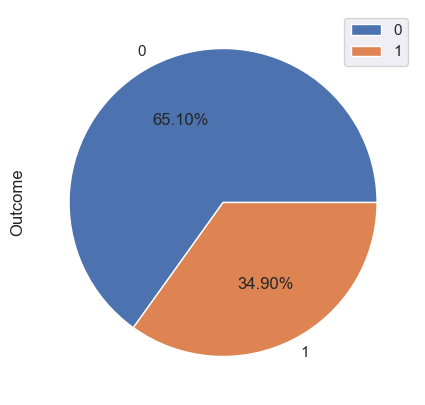

In [70]:
plt.figure(figsize=(5,5))
df["Outcome"].value_counts().plot(kind="pie", legend=True, autopct='%.2f%%', ylabel='Outcome')

In [15]:
# checking range of data

def minMax(x):
    return pd.Series(index=['min','max'], data=[x.min(),x.max()])

df.apply(minMax)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
min            0        0              0              0        0   0.0   
max           17      199            122             99      846  67.1   

     DiabetesPedigreeFunction  Age  Outcome  
min                     0.078   21        0  
max                     2.420   81        1

In [16]:
df.describe()

# descriptive statistics

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [17]:
# checking monotonous values

df.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

Dataset has no monotonous attributes.

In [18]:
# checking missing values

df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Dataset has no apparent missing values.

Inconsistent (weird) values do exist.

From the article:

However, according to domain knowledge [32], there are inconsistent values for the attributes: glucose concentration (Gluc), blood pressure (BP), skin fold thickness (Skin), insulin and BMI, whereby zero values are not within the
 normal range and are therefore inaccurate (Table 2).

In [19]:
for col in ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']:
    print(f'{col} has {df[col].value_counts()[0]} zeros')

Glucose has 5 zeros
BloodPressure has 35 zeros
SkinThickness has 227 zeros
Insulin has 374 zeros
BMI has 11 zeros


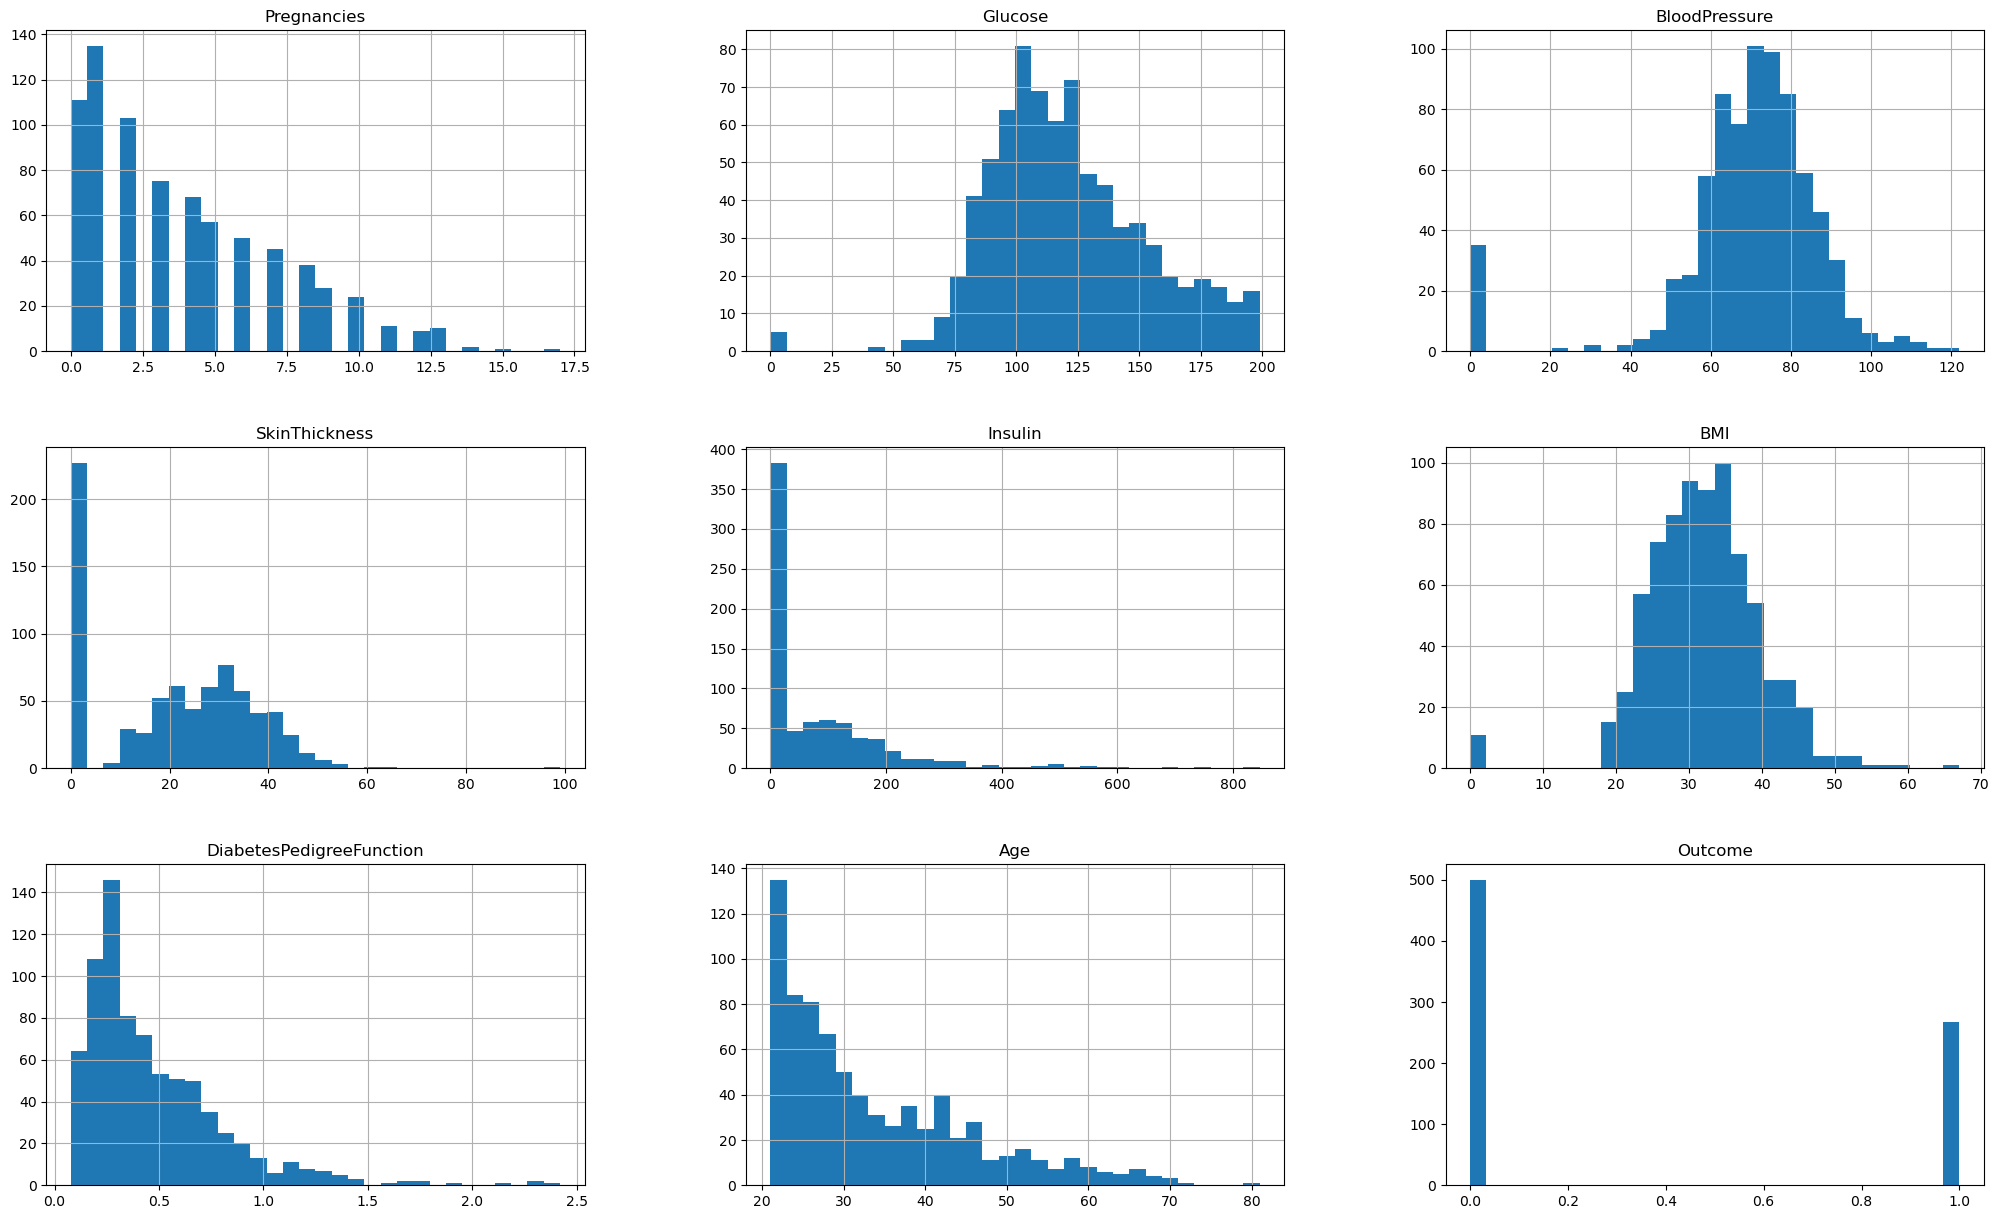

In [20]:
# visualization

df.hist(bins=30, figsize=(25, 15))
plt.grid()
plt.show()

From the article:

Since there were no missing or null values, only one
data pre-processing technique was applied in the first
round. This was to impute the median value on the features
that had invalid zero values.

In [22]:
df_pp = df.copy()

In [23]:
for col in ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']:
    df_pp[col] = df_pp[col].replace(0, df_pp[col].median())

In [24]:
df_pp.describe()

# no zeros anymore

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  121.656250      72.386719      27.334635   94.652344   
std       3.369578   30.438286      12.096642       9.229014  105.547598   
min       0.000000   44.000000      24.000000       7.000000   14.000000   
25%       1.000000   99.750000      64.000000      23.000000   30.500000   
50%       3.000000  117.000000      72.000000      23.000000   31.250000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    32.450911                  0.471876   33.240885    0.348958  
std      6.875366                  0.331329   11.760232    0.476951  
min     18.200000                  0.078000   21.000000    0.000000  
25%     27.500000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [35]:
df_pp[df_pp["Pregnancies"] > 10].value_counts().sum()

34

In [36]:
df_pp[df_pp["Pregnancies"] > 15].value_counts().sum()

1

Such large number of pregnancies is also a bit weird, but no modifications of this type have been mentioned in the paper, so I will leave it like that.

Text(0.5, 1.0, 'Patients with diabetes')

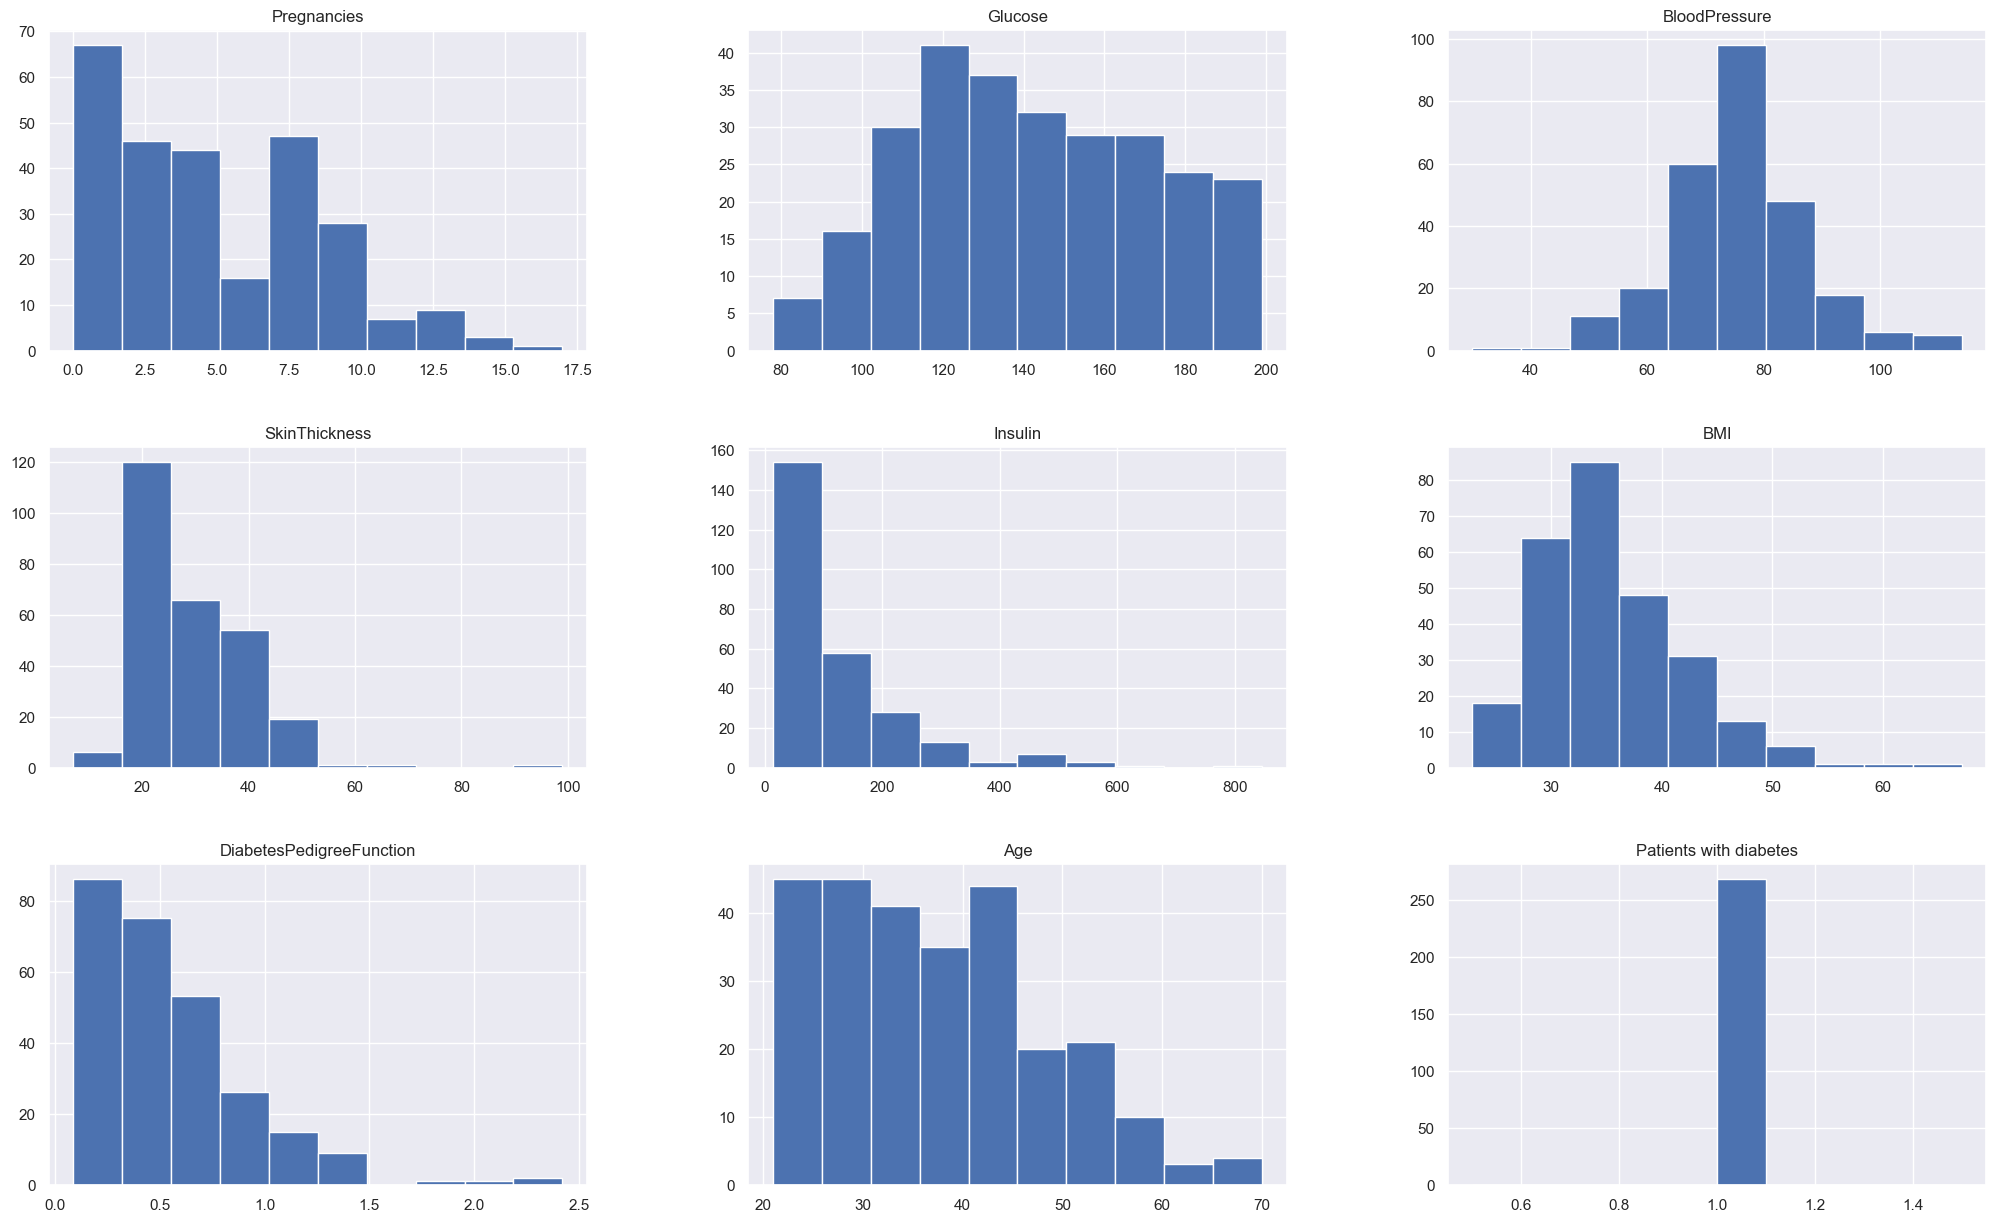

In [38]:
df_pp[df_pp["Outcome"]==1].hist()
plt.title('Patients with diabetes')

# data distribution for patients with diabetes

In [25]:
df.corr()

# correlation matrix of the unaltered dataset

Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221071                  0.137337   
BloodPressure             0.088933  0.281805                  0.041265   
SkinThickness             0.436783  0.392573                  0.183928   
Insulin                   1.000000  0.197859                  0.185071   
BMI                       0.197859  1.000000                  0.140647   
DiabetesPedigreeFunction  0.185071  0.140647                  1.000000   
Age                      -0.042163  0.036242                  0.033561   
Outcome                   0.130548  0.292695                  0.173844   

                               Age   Outcome  
Pregnancies               0.544341  0.221898  
Glucose                   0.263514  0.466581  
BloodPressure             0.239528  0.065068  
SkinThickness            -0.113970  0.074752  
Insulin                  -0.042163  0.130548  
BMI                       0.036242  0.292695  
DiabetesPedigreeFunction  0.033561  0.173844  
Age                       1.000000  0.238356  
Outcome                   0.238356  1.000000

In [26]:
df_pp.corr() 

# correlation matrix of the altered dataset (for the first round of experiments - zeros changed with median)

Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.128213       0.208615       0.032568   
Glucose                      0.128213  1.000000       0.218937       0.172143   
BloodPressure                0.208615  0.218937       1.000000       0.147809   
SkinThickness                0.032568  0.172143       0.147809       1.000000   
Insulin                     -0.055697  0.357573      -0.028721       0.238188   
BMI                          0.021546  0.231400       0.281132       0.546951   
DiabetesPedigreeFunction    -0.033523  0.137327      -0.002378       0.142977   
Age                          0.544341  0.266909       0.324915       0.054514   
Outcome                      0.221898  0.492782       0.165723       0.189065   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.055697  0.021546                 -0.033523   
Glucose                   0.357573  0.231400                  0.137327   
BloodPressure            -0.028721  0.281132                 -0.002378   
SkinThickness             0.238188  0.546951                  0.142977   
Insulin                   1.000000  0.189022                  0.178029   
BMI                       0.189022  1.000000                  0.153506   
DiabetesPedigreeFunction  0.178029  0.153506                  1.000000   
Age                      -0.015413  0.025744                  0.033561   
Outcome                   0.148457  0.312249                  0.173844   

                               Age   Outcome  
Pregnancies               0.544341  0.221898  
Glucose                   0.266909  0.492782  
BloodPressure             0.324915  0.165723  
SkinThickness             0.054514  0.189065  
Insulin                  -0.015413  0.148457  
BMI                       0.025744  0.312249  
DiabetesPedigreeFunction  0.033561  0.173844  
Age                       1.000000  0.238356  
Outcome                   0.238356  1.000000

<Axes: >

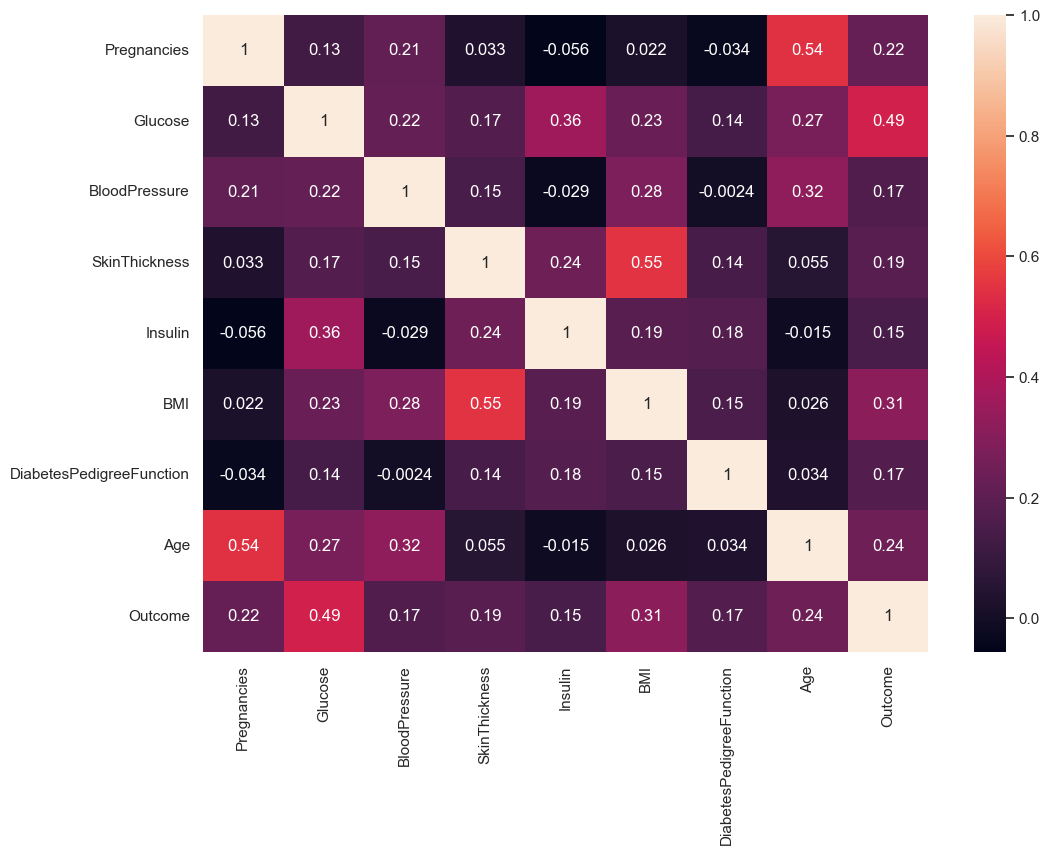

In [27]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(df_pp.corr(), annot=True)

Glucose, BMI and Age have the highest correlation with Outcome. I will make few visualizations to try to draw some conclusions.

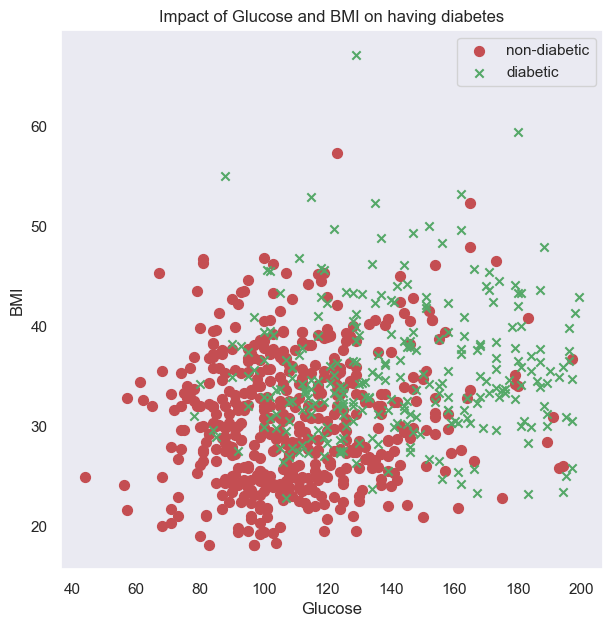

In [45]:
mask_outcome = df_pp.Outcome == 1

# plot
plt.figure(figsize=(7,7))
plt.scatter(df_pp.loc[~mask_outcome,'Glucose'], df_pp.loc[~mask_outcome,'BMI'], s=50, alpha=1, c='r', label='non-diabetic')
plt.scatter(df_pp.loc[mask_outcome,'Glucose'], df_pp.loc[mask_outcome,'BMI'], alpha=1, marker='x', c='g', label='diabetic')
plt.xlabel('Glucose')
plt.ylabel('BMI')
plt.title('Impact of Glucose and BMI on having diabetes')
plt.grid()
plt.legend(loc='best')
plt.show()

Higher Glucose concentration means higher chance for obtaining diabetes no matter the BMI.

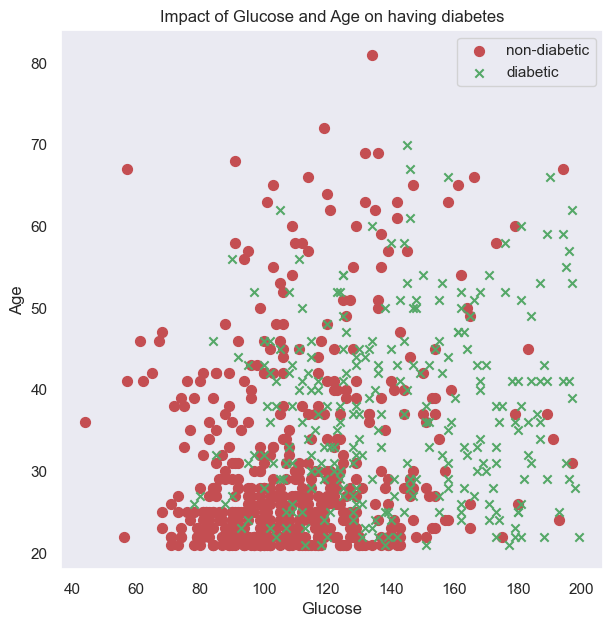

In [46]:
plt.figure(figsize=(7,7))
plt.scatter(df_pp.loc[~mask_outcome,'Glucose'], df_pp.loc[~mask_outcome,'Age'], s=50, alpha=1, c='r', label='non-diabetic')
plt.scatter(df_pp.loc[mask_outcome,'Glucose'], df_pp.loc[mask_outcome,'Age'], alpha=1, marker='x', c='g', label='diabetic')
plt.xlabel('Glucose')
plt.ylabel('Age')
plt.title('Impact of Glucose and Age on having diabetes')
plt.grid()
plt.legend(loc='best')
plt.show()

Higher Glucose concentration means higher chance for obtaining diabetes no matter the Age.

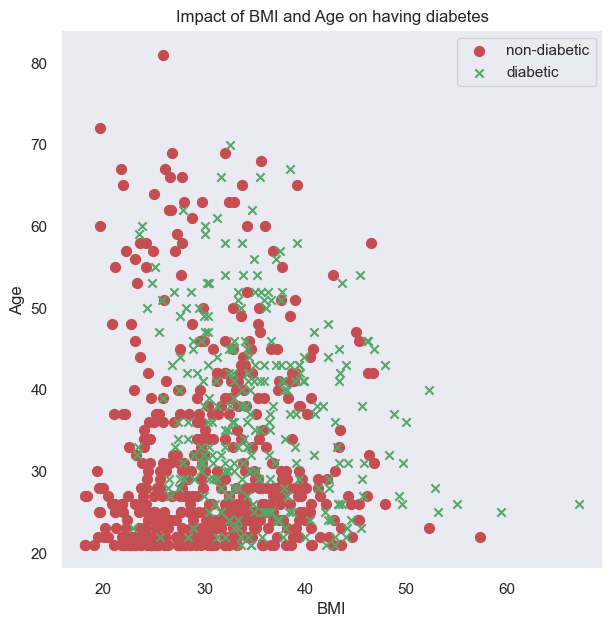

In [47]:
plt.figure(figsize=(7,7))
plt.scatter(df_pp.loc[~mask_outcome,'BMI'], df_pp.loc[~mask_outcome,'Age'], s=50, alpha=1, c='r', label='non-diabetic')
plt.scatter(df_pp.loc[mask_outcome,'BMI'], df_pp.loc[mask_outcome,'Age'], alpha=1, marker='x', c='g', label='diabetic')
plt.xlabel('BMI')
plt.ylabel('Age')
plt.title('Impact of BMI and Age on having diabetes')
plt.grid()
plt.legend(loc='best')
plt.show()

Lower BMI indicates lower probability of obtaining diabetes no matter the Age.

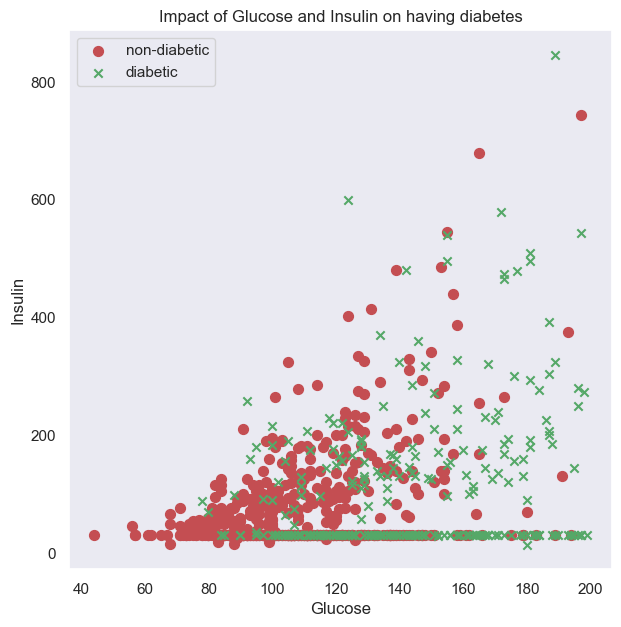

In [44]:
# plot
plt.figure(figsize=(7,7))
plt.scatter(df_pp.loc[~mask_outcome,'Glucose'], df_pp.loc[~mask_outcome,'Insulin'], s=50, alpha=1, c='r', label='non-diabetic')
plt.scatter(df_pp.loc[mask_outcome,'Glucose'], df_pp.loc[mask_outcome,'Insulin'], alpha=1, marker='x', c='g', label='diabetic')
plt.xlabel('Glucose')
plt.ylabel('Insulin')
plt.title('Impact of Glucose and Insulin on having diabetes')
plt.grid()
plt.legend(loc='best')
plt.show()

Higher Glucose - higher Insulin - more diabetes.

Next plot shows how many people diagnosed with diabetes have certain age.

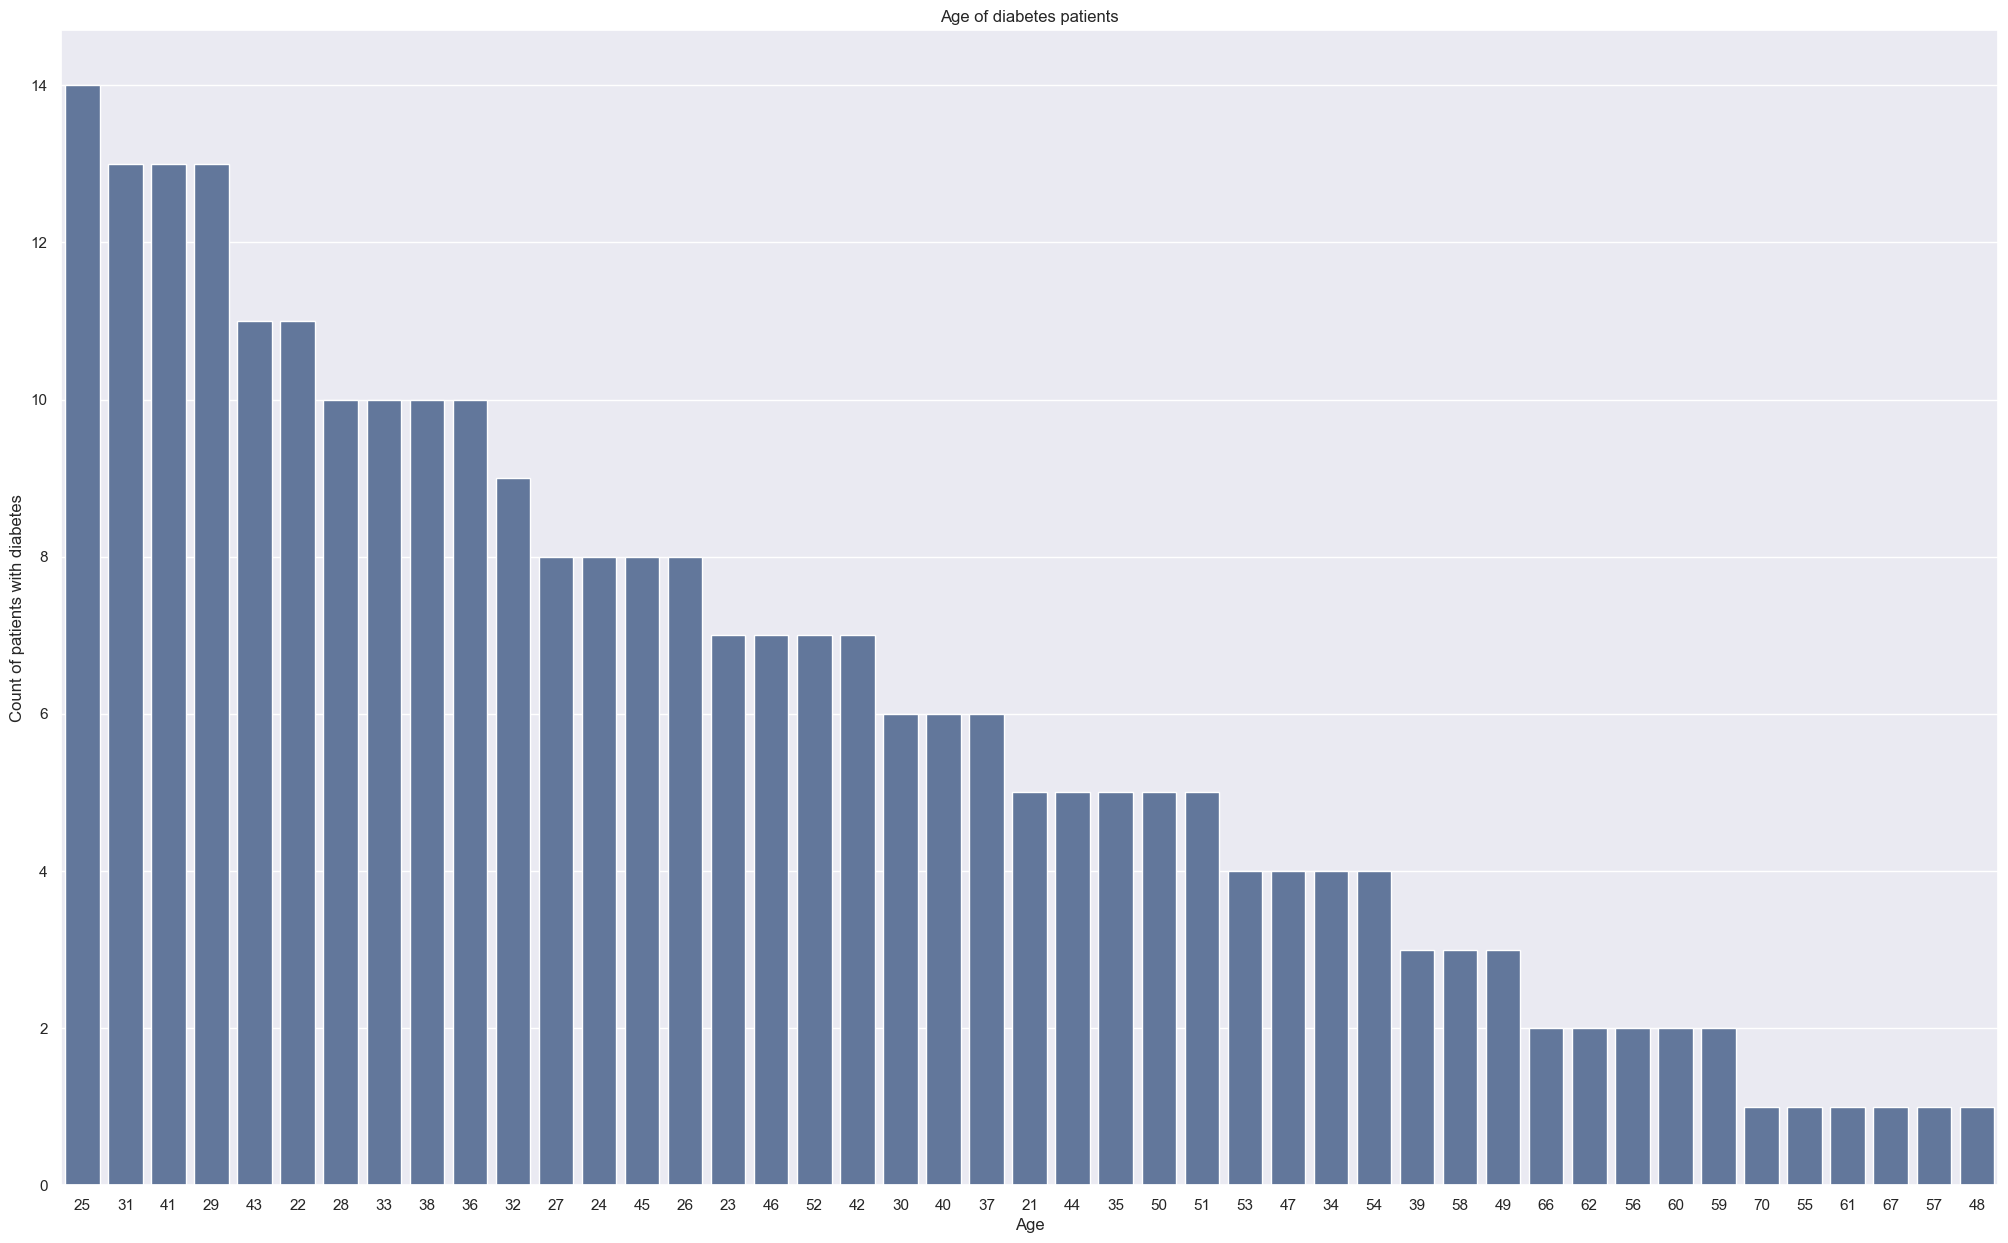

In [69]:
sns.countplot(x='Age', data=df_pp[df_pp['Outcome'] == 1], color='#5975a4', order=df_pp[df_pp['Outcome'] == 1]['Age'].value_counts().index)
plt.title('Age of diabetes patients')
plt.xlabel('Age')
plt.ylabel('Count of patients with diabetes')
plt.show()

Figure 4 and Figure 5 in the paper are done for the original (unaltered) dataset. However, I will show the graphs for the altered version also to visualize the changes made (zeros replaced with median).

C:\Users\Ivana\anaconda3\envs\proba1\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


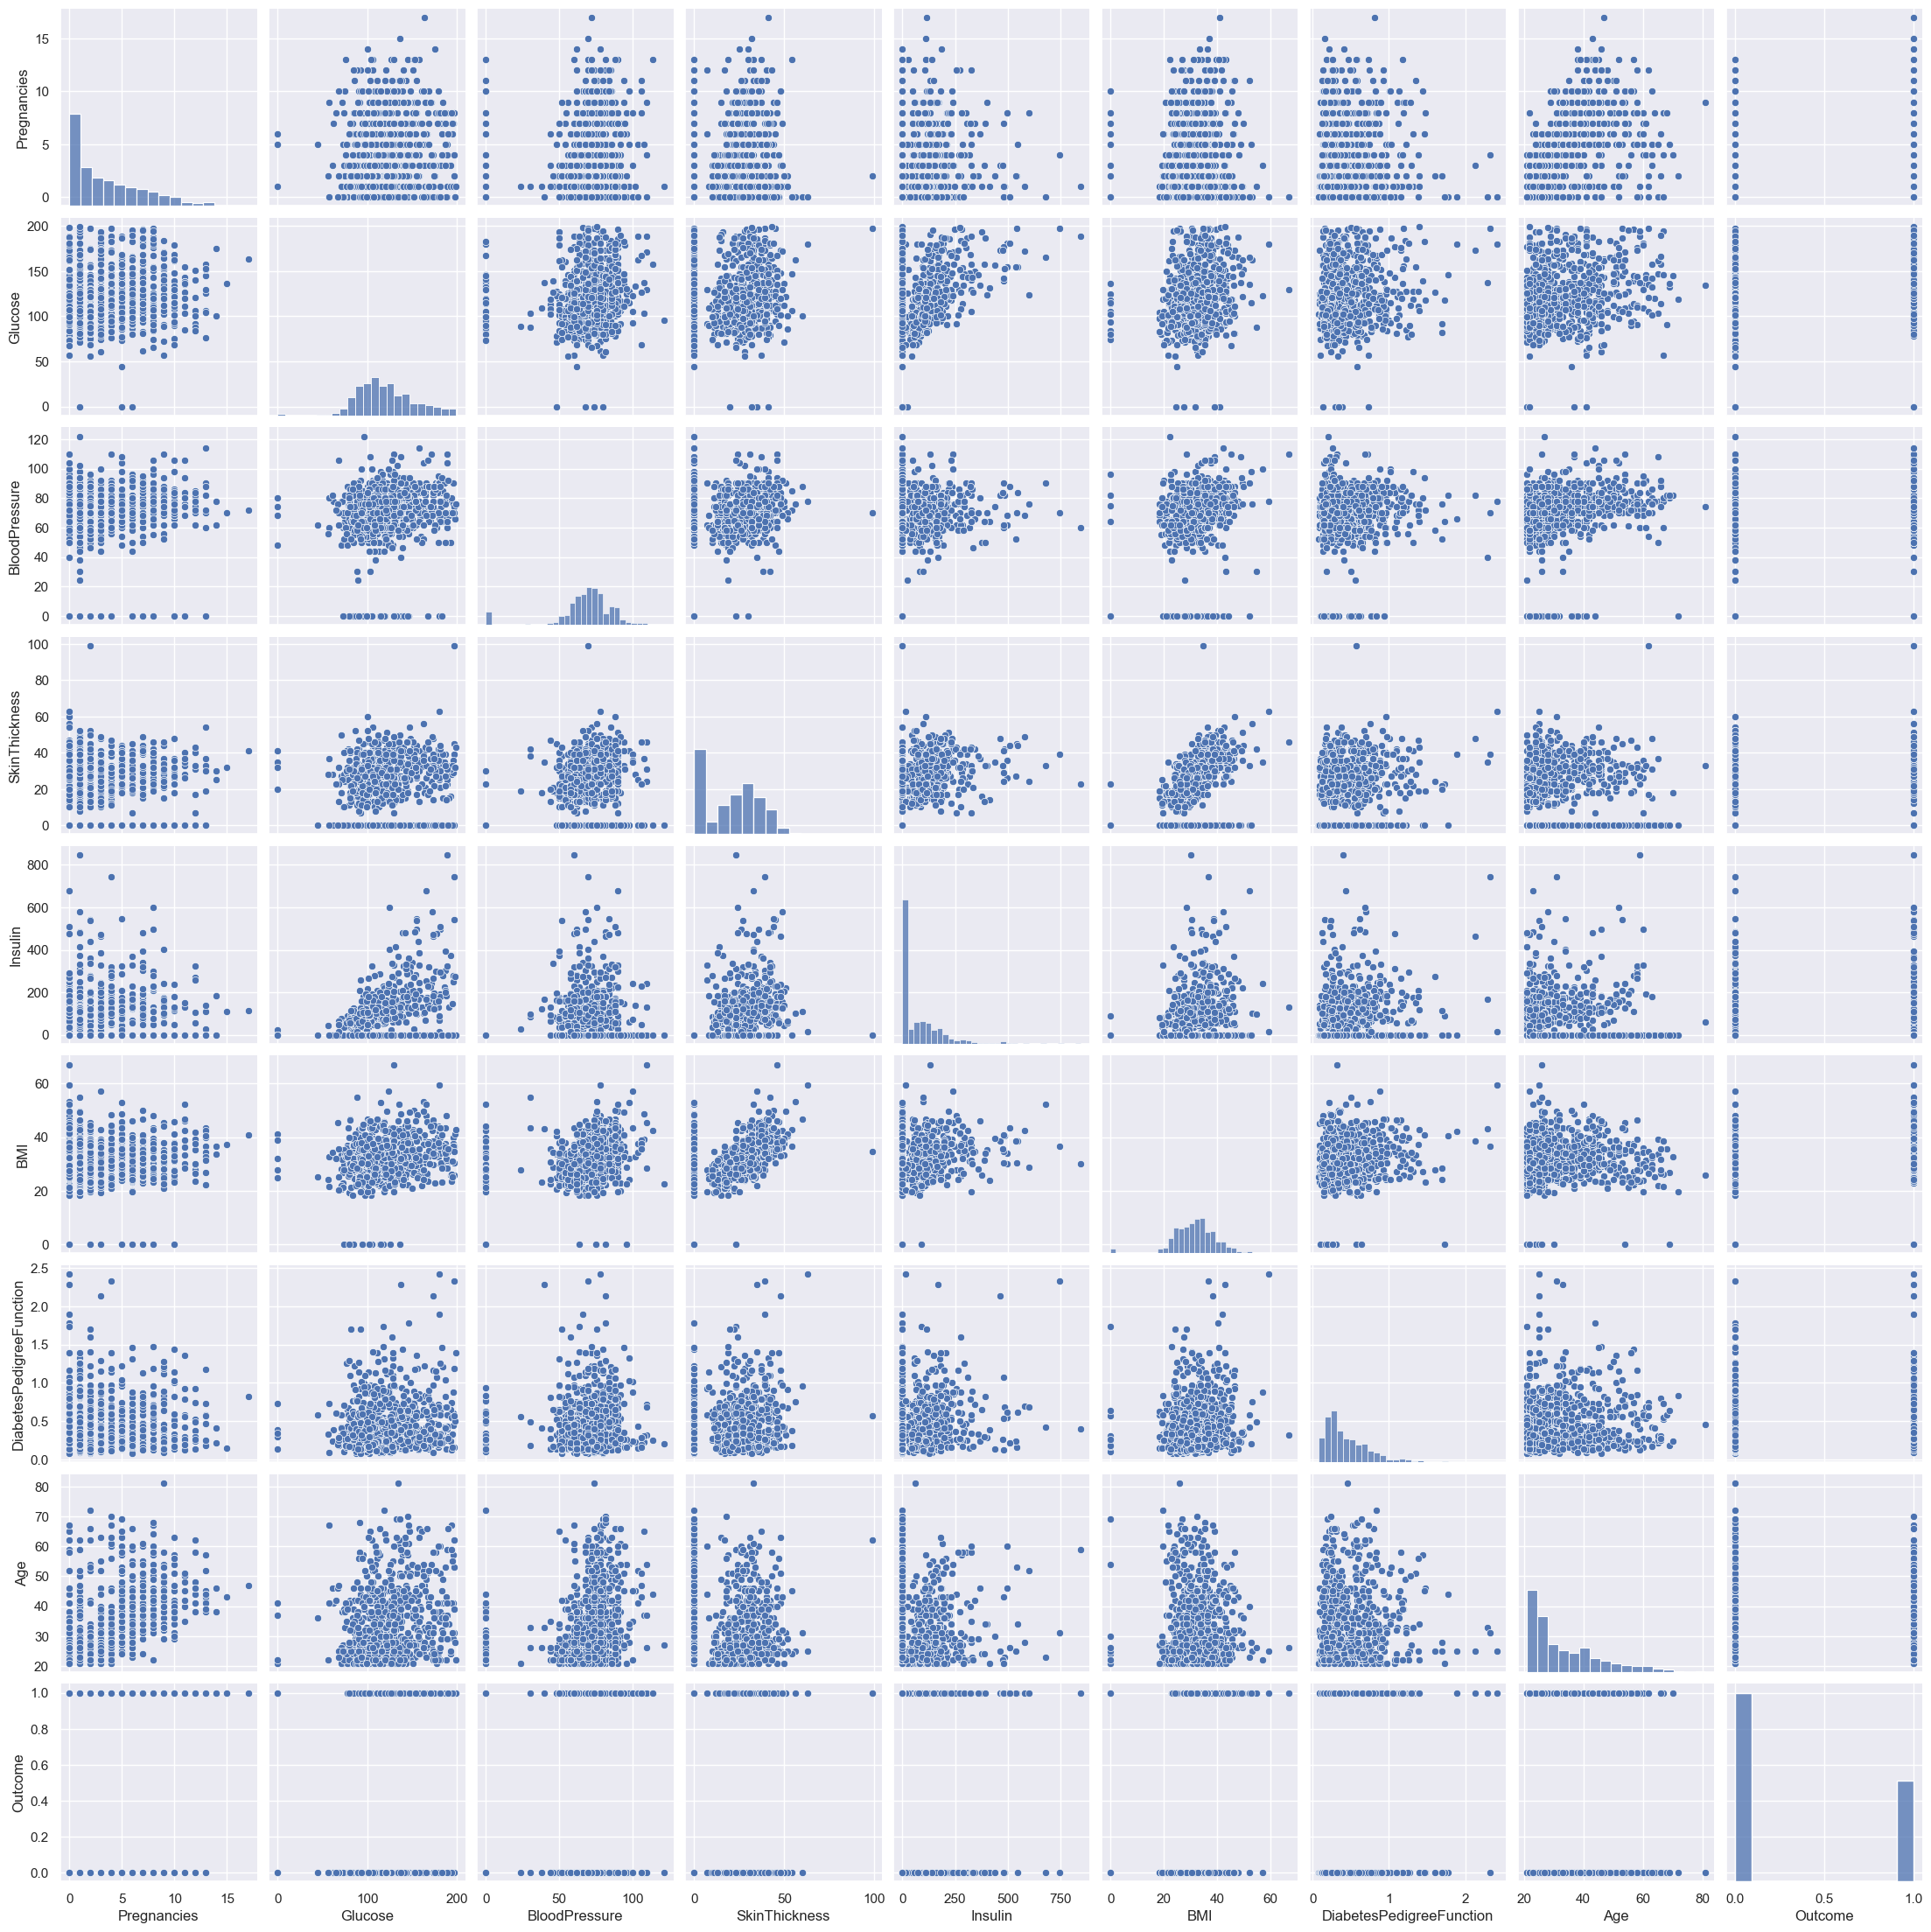

In [28]:
sns.set(rc={'figure.figsize':(25,15)})
sns.pairplot(df.loc[:,:])
plt.show()

C:\Users\Ivana\anaconda3\envs\proba1\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


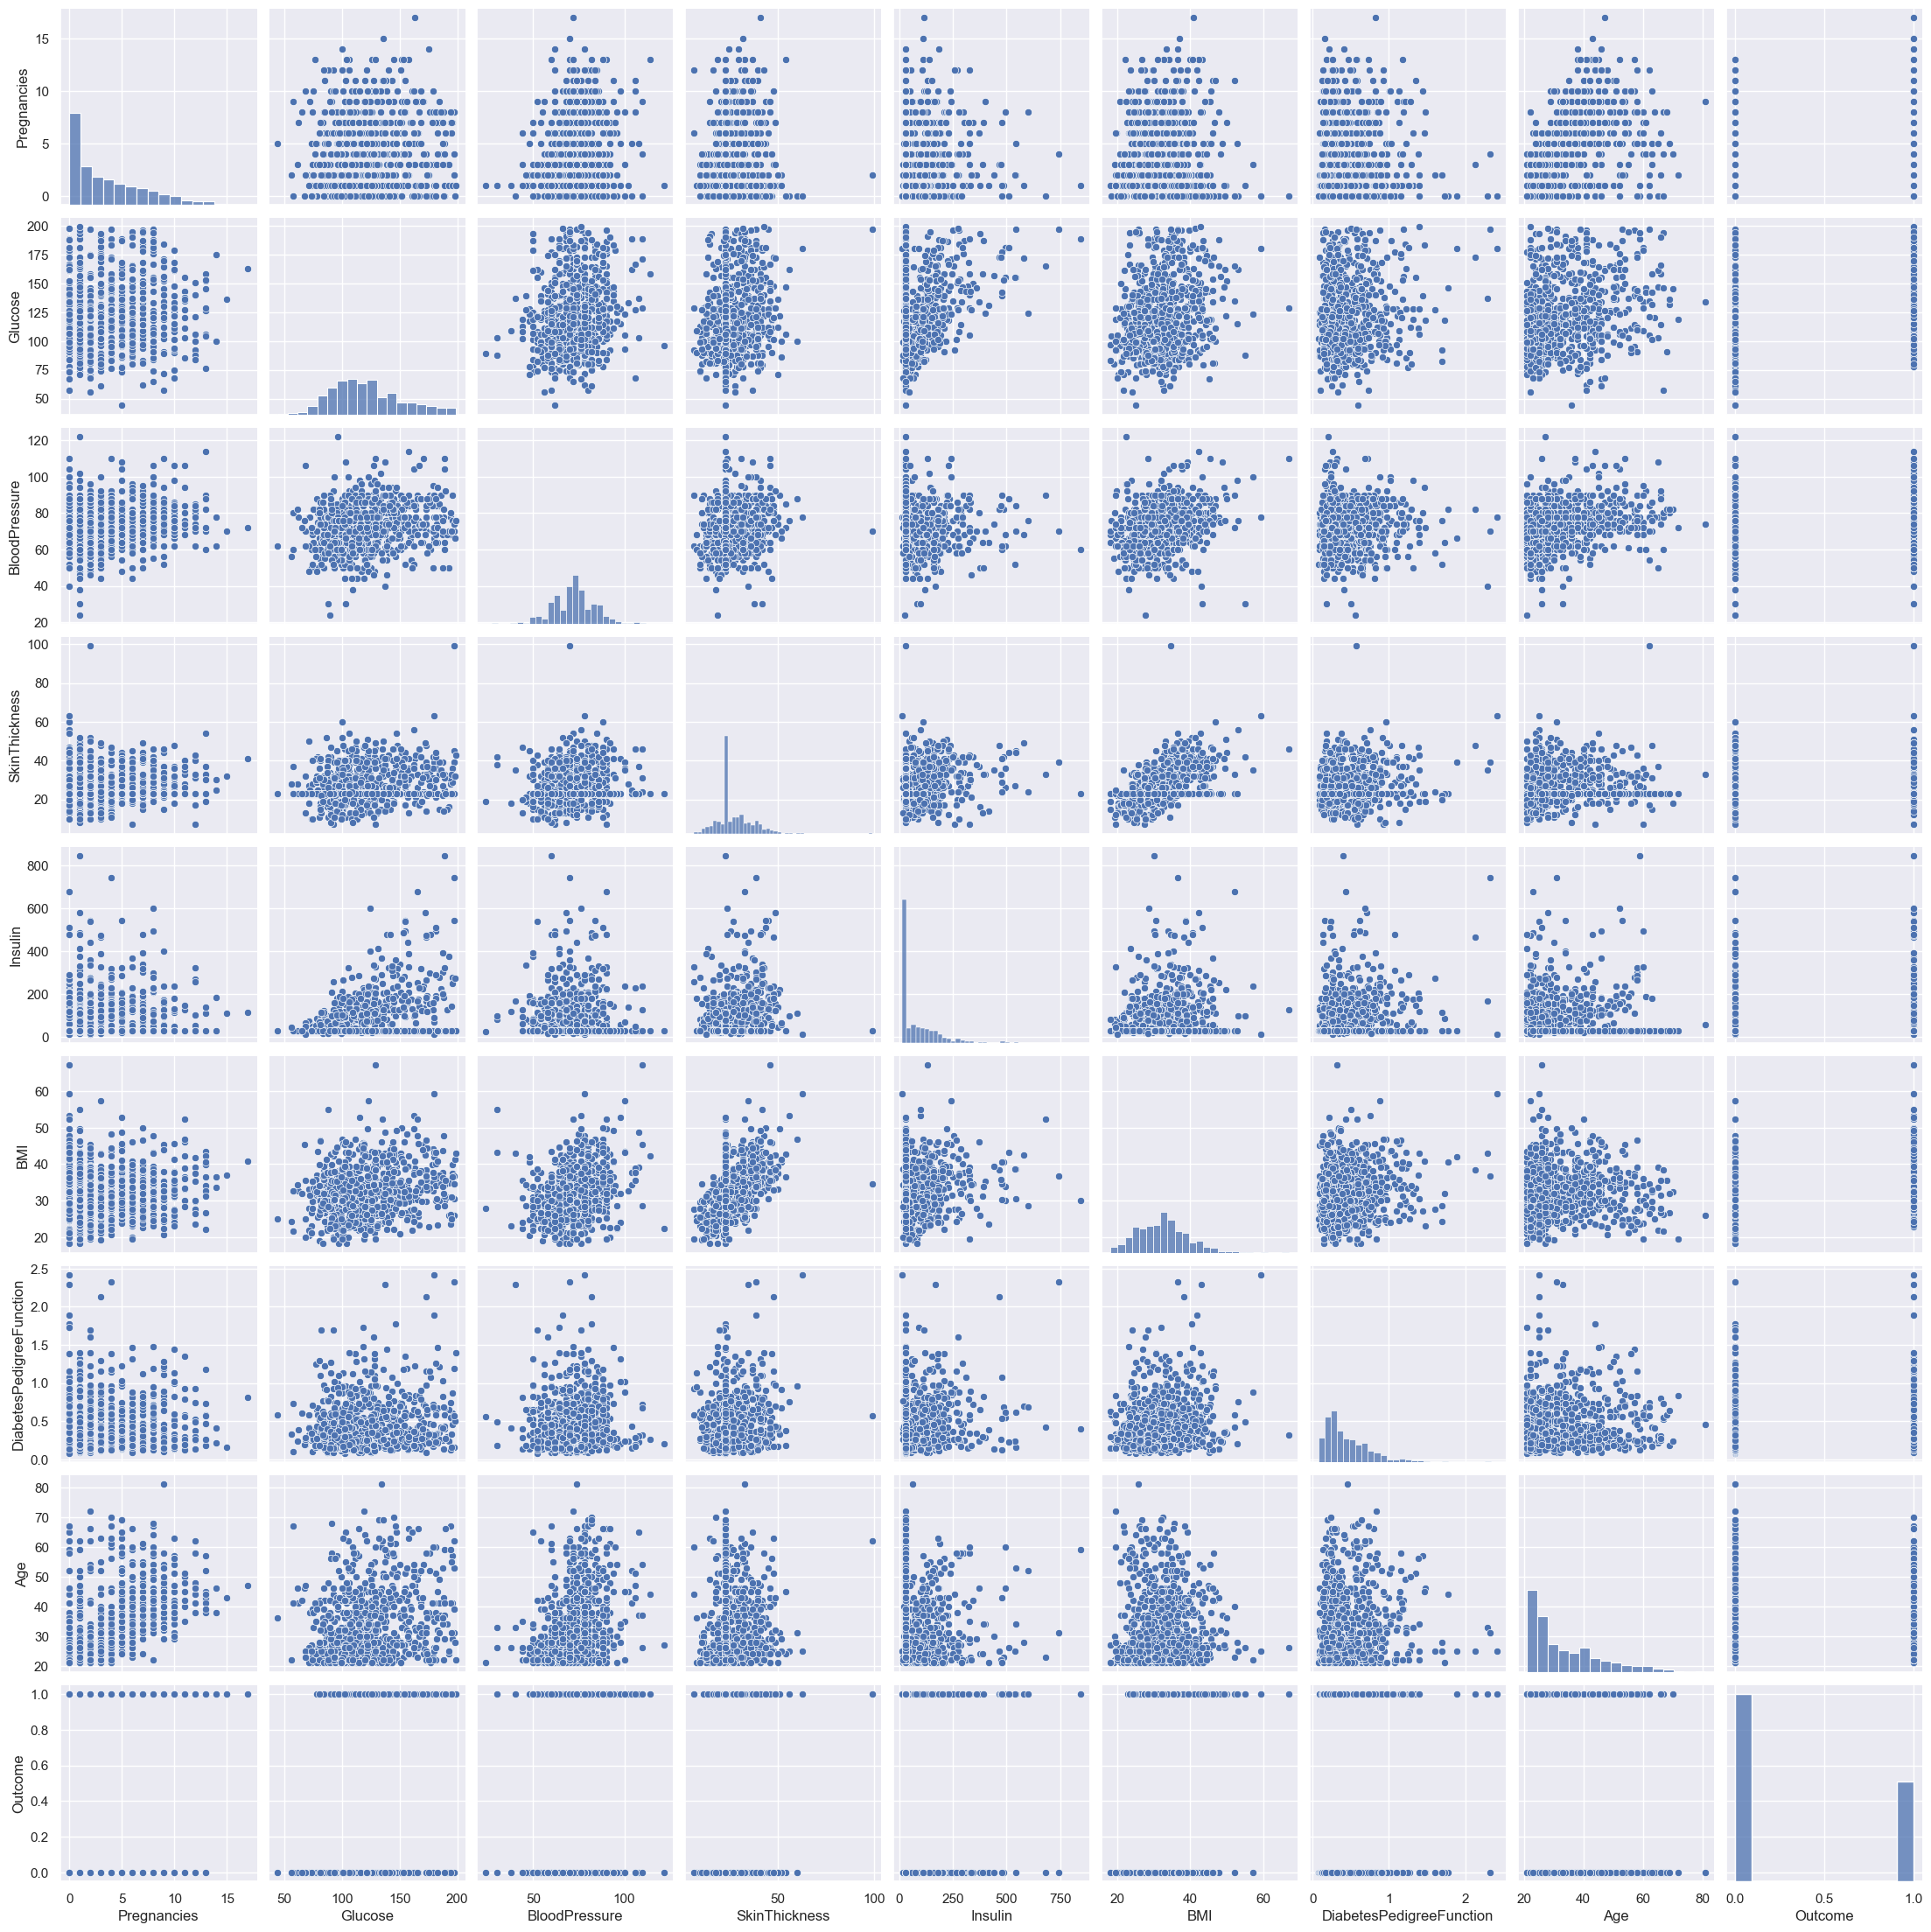

In [29]:
sns.set(rc={'figure.figsize':(25,15)})
sns.pairplot(df_pp.loc[:,:])
plt.show()

C:\Users\Ivana\anaconda3\envs\proba1\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


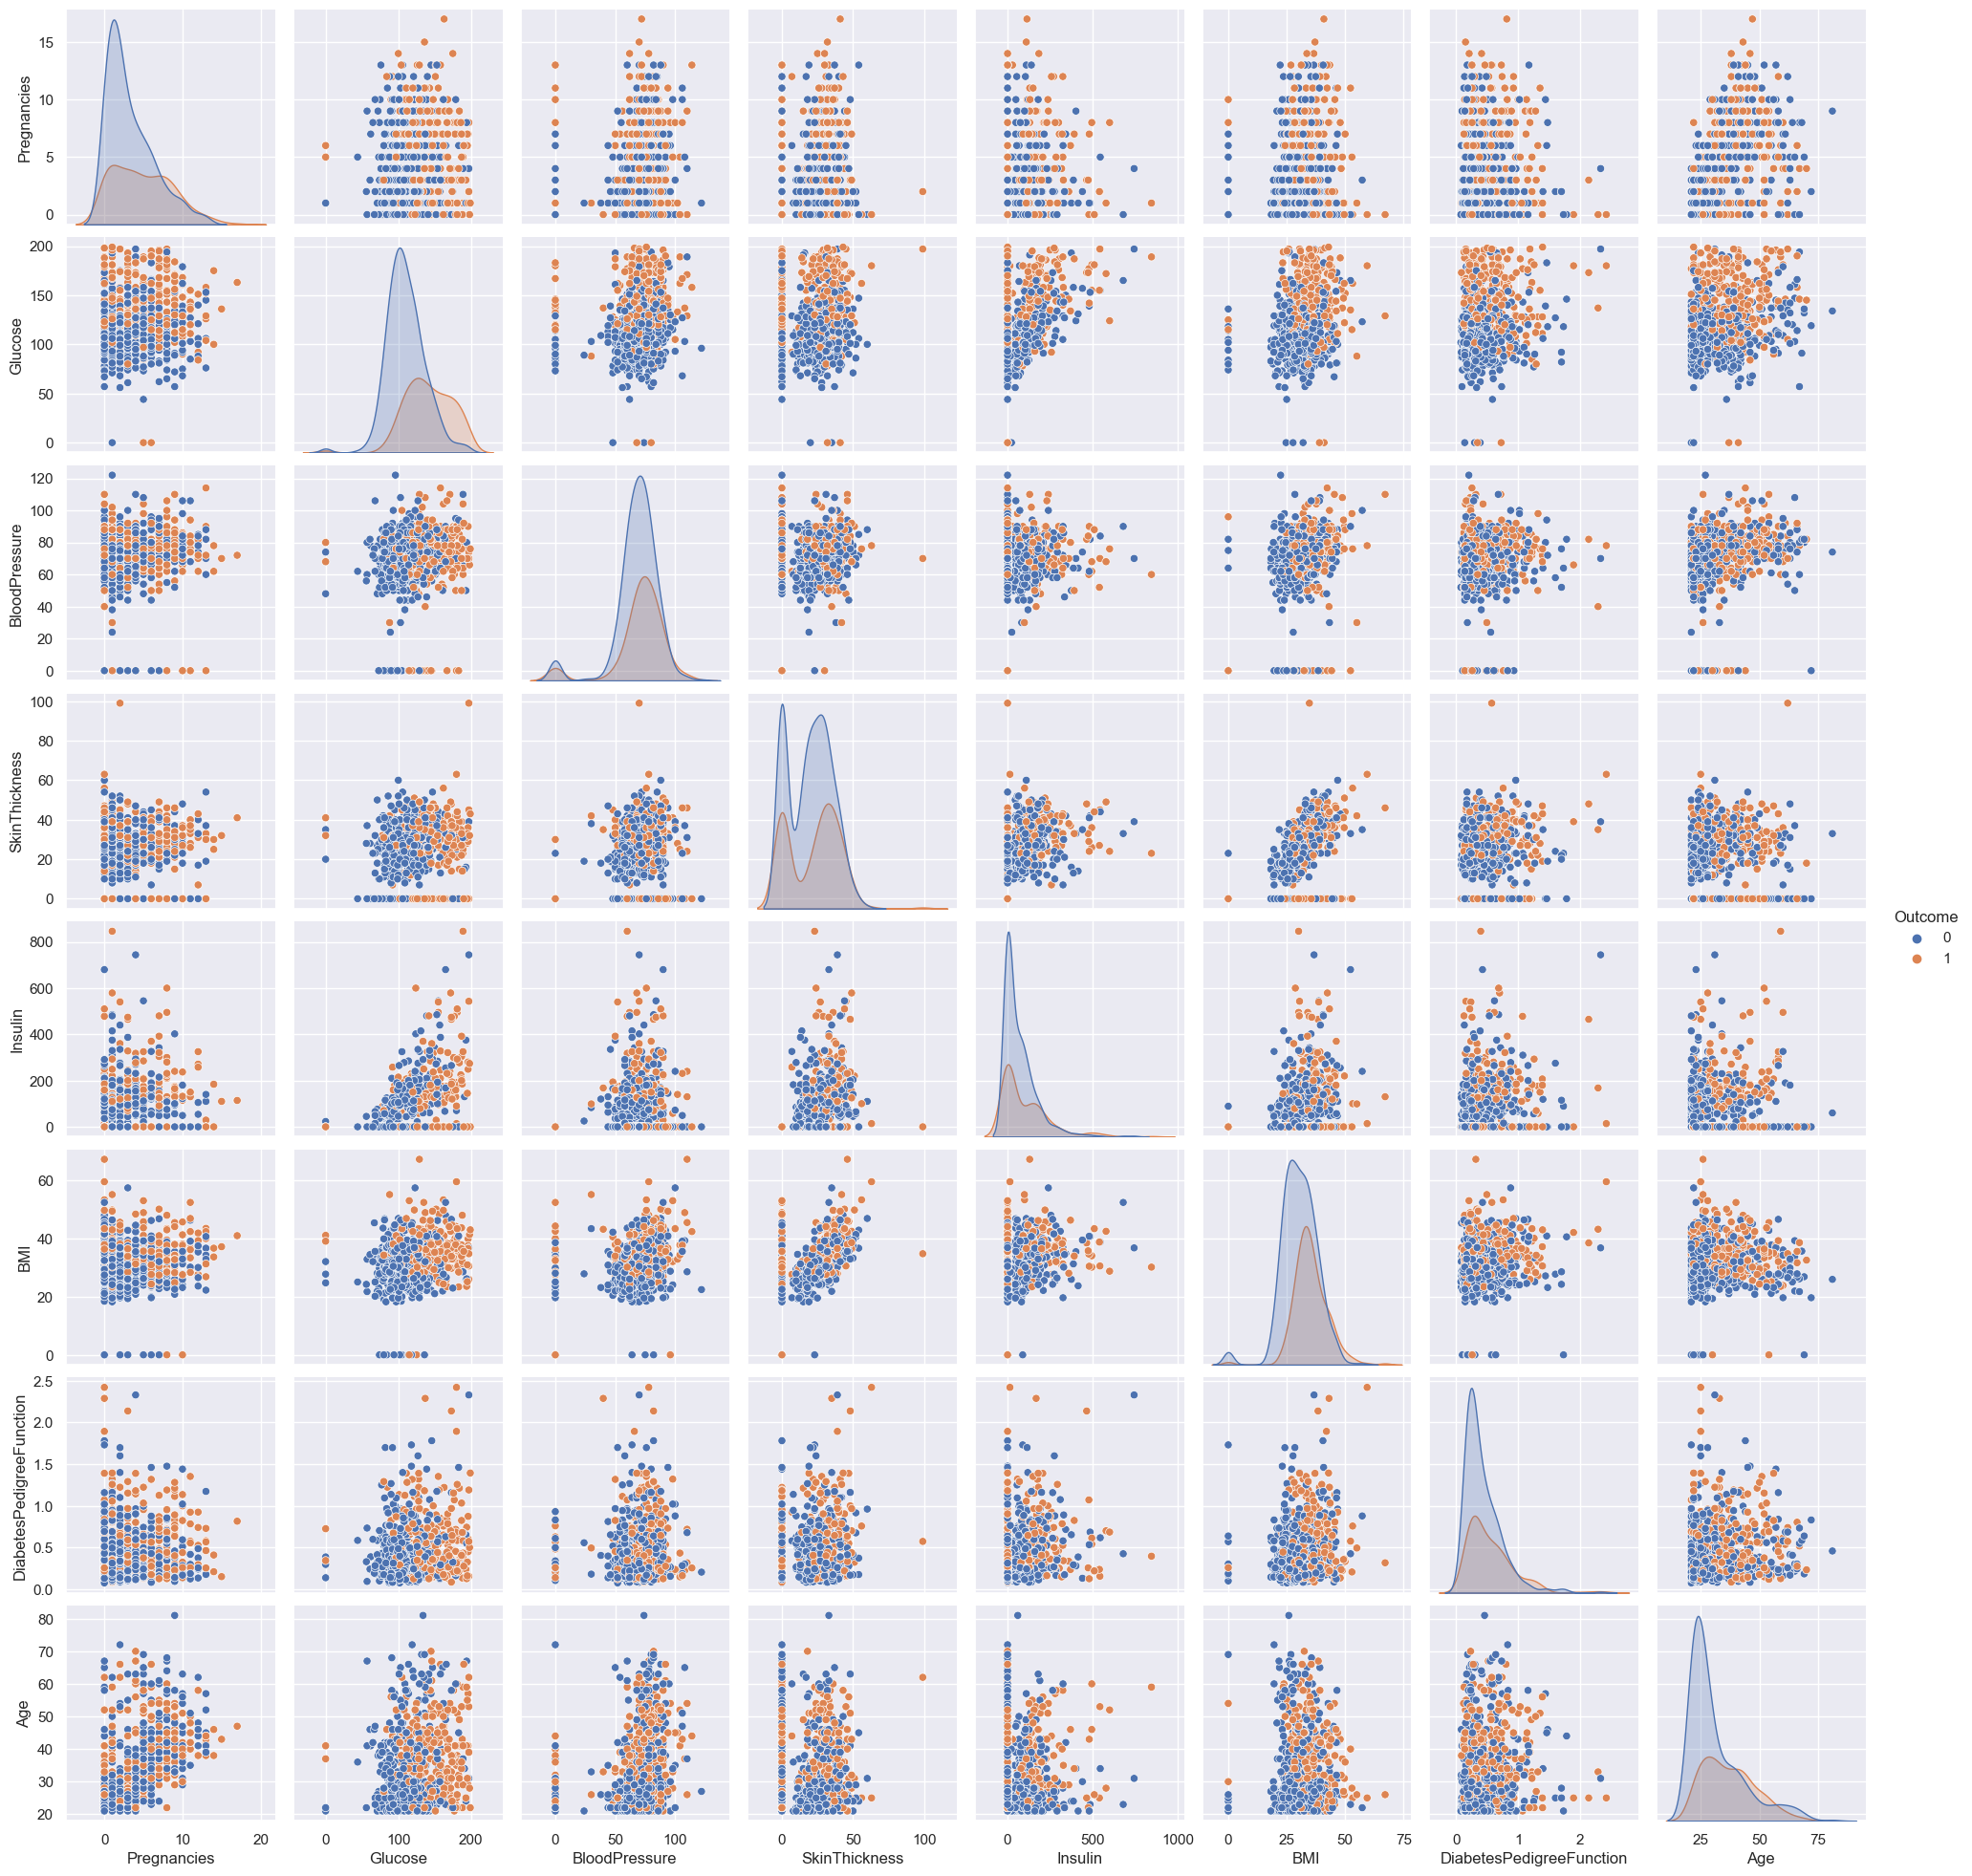

In [43]:
sns.set(rc={'figure.figsize':(25,15)})
sns.pairplot(df.loc[:,:], hue='Outcome') # with hue
plt.show()

C:\Users\Ivana\anaconda3\envs\proba1\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


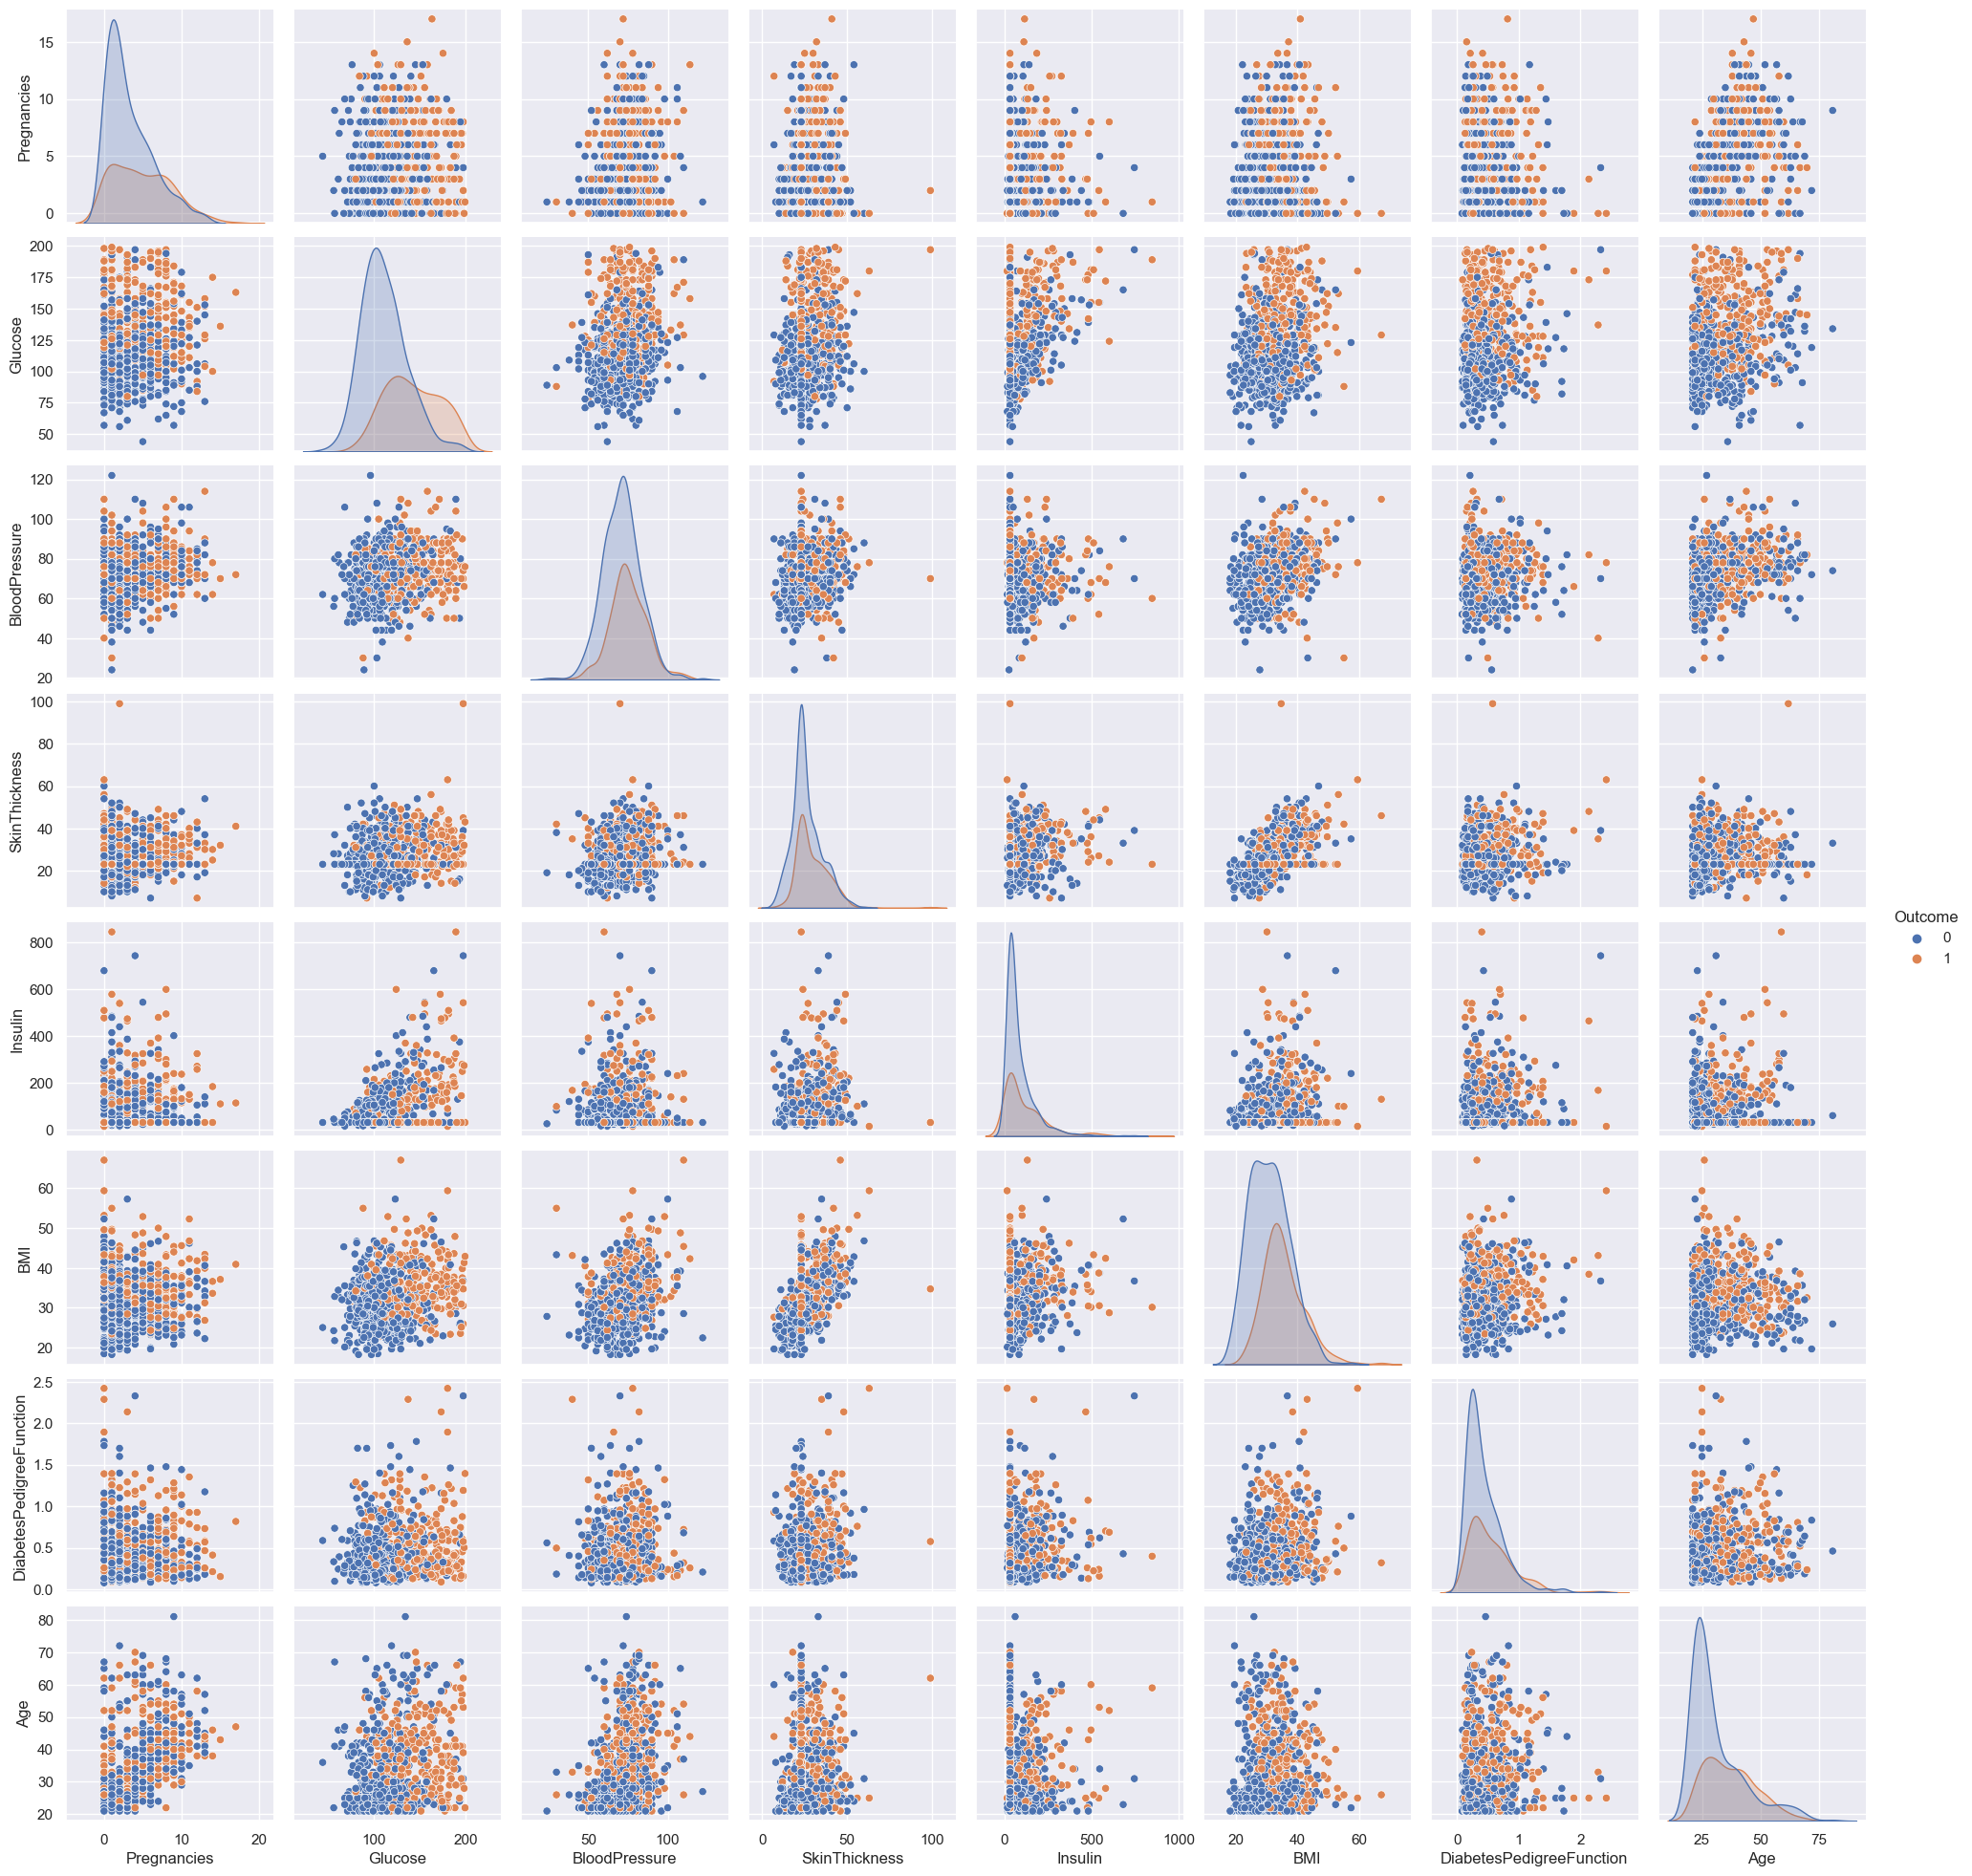

In [46]:
sns.set(rc={'figure.figsize':(25,15)})
sns.pairplot(df_pp.loc[:,:], hue='Outcome') # with hue
plt.show()

Paraphrase from the text:

Scattered points indicate that there is no obvious relationship. If the points are roughly arranged in a straight line, it
means that they are linearly related. 

The most closely correlated/proportional features include [Pregnancy and Age], [Skin Thickness and BMI], and [Glucose and Insulin] because their scatterplot figures all show a positive correlation.

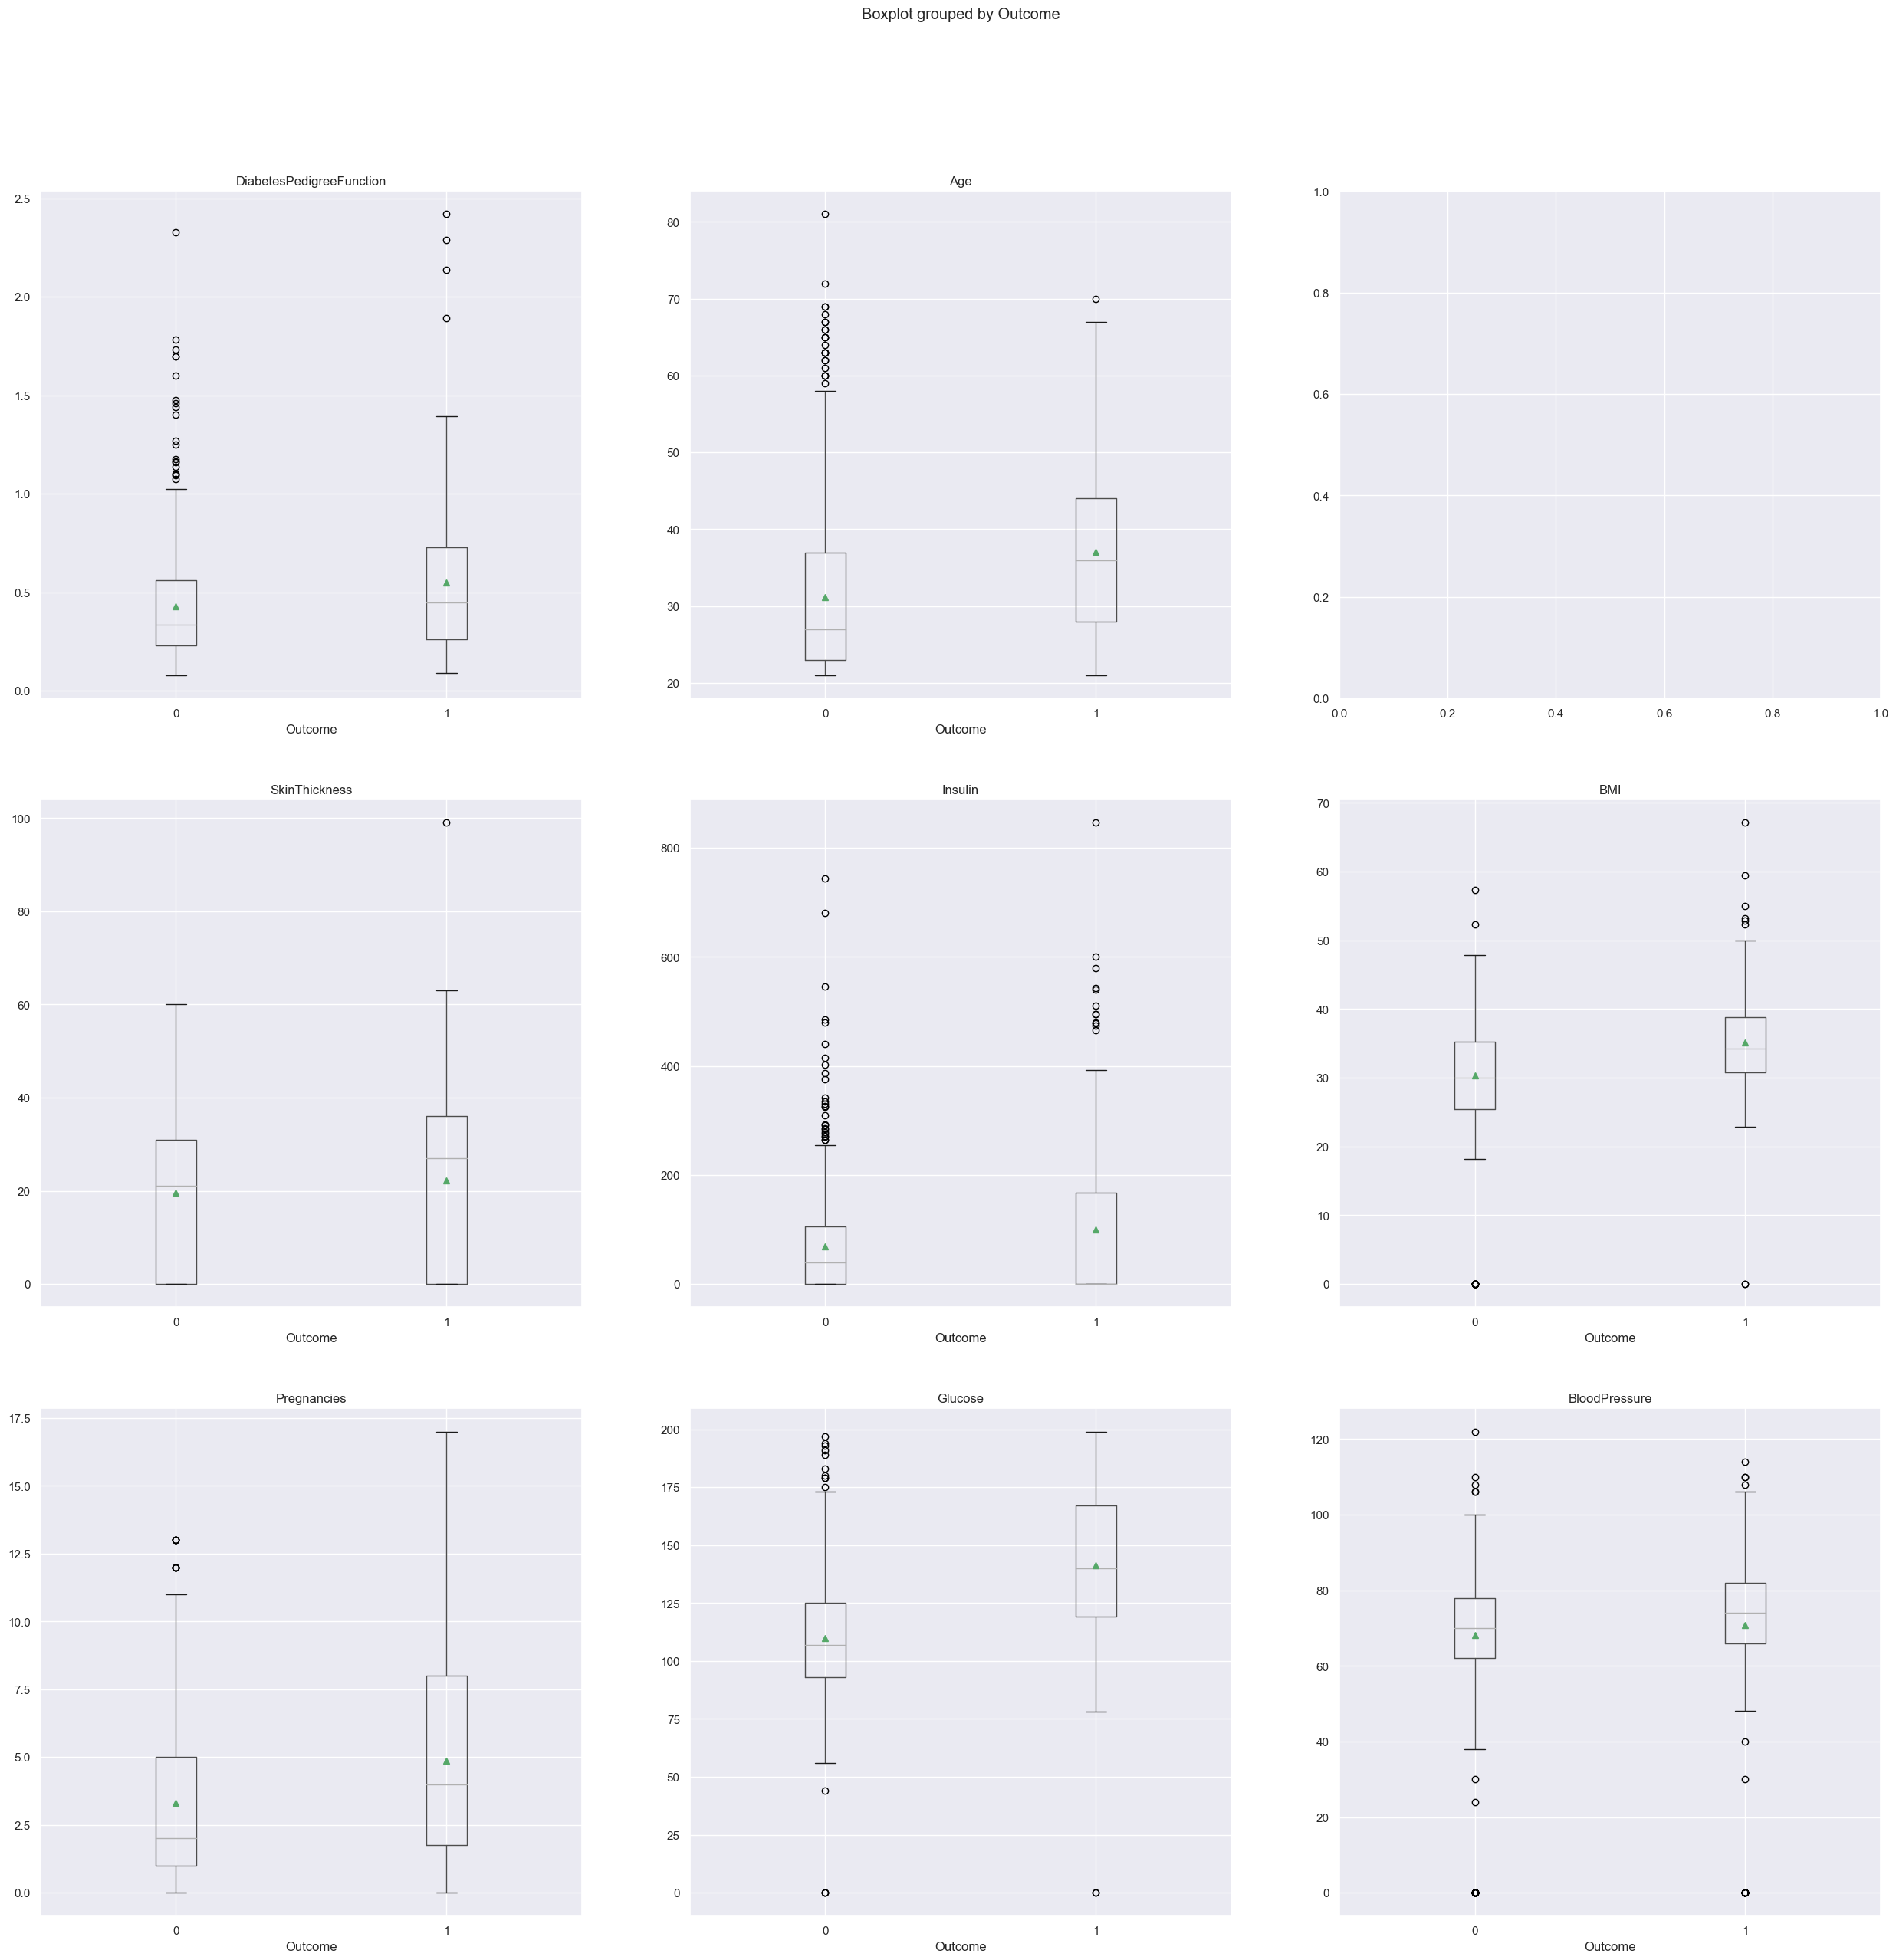

In [51]:
fig, axes = plt.subplots(3,3, figsize=(30,30)) 

df.boxplot(by='Outcome', column='DiabetesPedigreeFunction', ax=axes.flatten()[0], showmeans=True)
df.boxplot(by='Outcome', column='Age', ax=axes.flatten()[1], showmeans=True)
df.boxplot(by='Outcome', column='SkinThickness', ax=axes.flatten()[3], showmeans=True)
df.boxplot(by='Outcome', column='Insulin', ax=axes.flatten()[4], showmeans=True)
df.boxplot(by='Outcome', column='BMI', ax=axes.flatten()[5], showmeans=True)
df.boxplot(by='Outcome', column='Pregnancies', ax=axes.flatten()[6], showmeans=True)
df.boxplot(by='Outcome', column='Glucose', ax=axes.flatten()[7], showmeans=True)
df.boxplot(by='Outcome', column='BloodPressure', ax=axes.flatten()[8], showmeans=True)
plt.show()


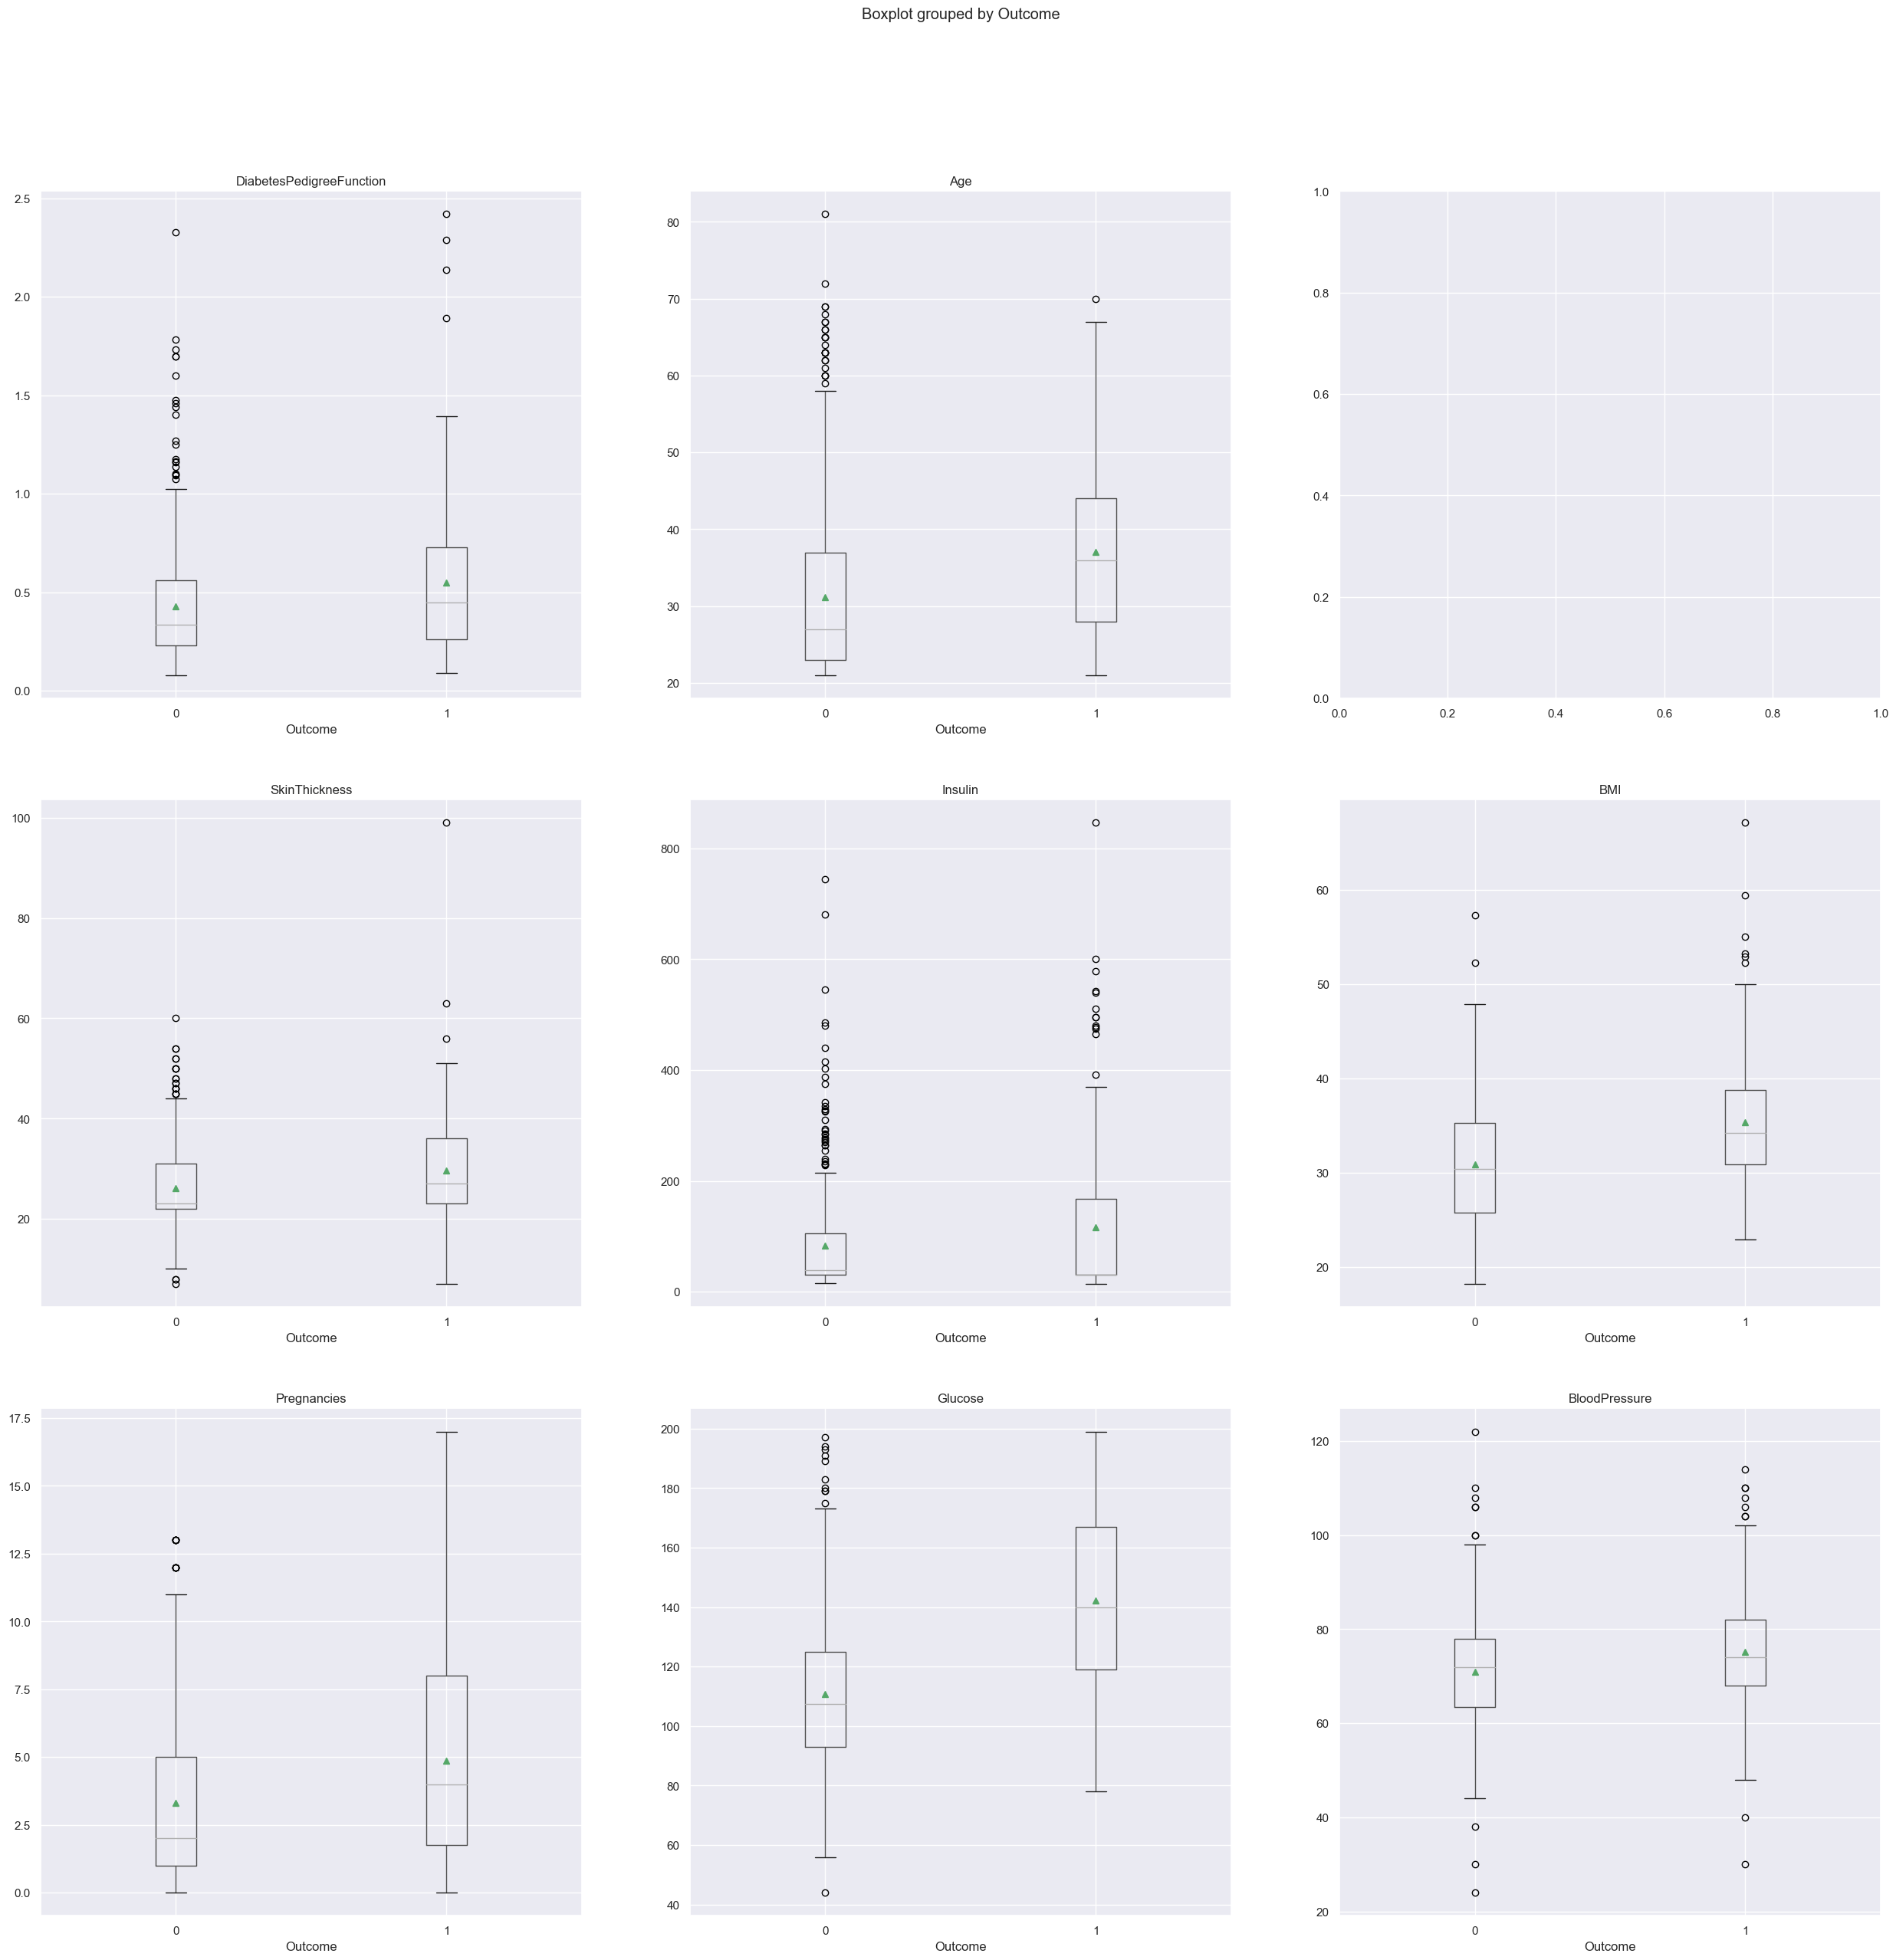

In [52]:
fig, axes = plt.subplots(3,3, figsize=(30,30)) 

df_pp.boxplot(by='Outcome', column='DiabetesPedigreeFunction', ax=axes.flatten()[0], showmeans=True)
df_pp.boxplot(by='Outcome', column='Age', ax=axes.flatten()[1], showmeans=True)
df_pp.boxplot(by='Outcome', column='SkinThickness', ax=axes.flatten()[3], showmeans=True)
df_pp.boxplot(by='Outcome', column='Insulin', ax=axes.flatten()[4], showmeans=True)
df_pp.boxplot(by='Outcome', column='BMI', ax=axes.flatten()[5], showmeans=True)
df_pp.boxplot(by='Outcome', column='Pregnancies', ax=axes.flatten()[6], showmeans=True)
df_pp.boxplot(by='Outcome', column='Glucose', ax=axes.flatten()[7], showmeans=True)
df_pp.boxplot(by='Outcome', column='BloodPressure', ax=axes.flatten()[8], showmeans=True)
plt.show()

From the text:

As shown in Fig. 5, there are outliers in DPF, age,
insulin, glucose, BMI, and blood pressure features, which
might be due to other underlying factors. It would be best
to standardize the data to avoid the ill effects of the outliers.
The dataset is not a very large one, so it would be
better to avoid removing rows unnecessarily.

In [93]:
# standardization

x = df_pp.loc[:, ~df_pp.columns.isin(['Outcome'])].values 
standardized_data = StandardScaler().fit_transform(x)
print(standardized_data.mean())
print(standardized_data.std())

9.374734784757995e-17
1.0
